**Customers Segmentation based on their Credit Card usage behavior:**

**Introduction:**

This project is about Customers Segmentation based on their credit card usage behavior. The dataset used for this analysis was taken from Kaggle dataset. The dataset contains credit card usage of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies. The dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months which was updated 2 years ago. Customer segments enable us to understand the patterns that distinguish customers. 

**Objective:**

- Customer Segmentation by using customer behaviors in order to define a proper marketing strategy.

In [1]:
# Import some packages and libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import Timer
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap
from scipy import stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
import umap
import scipy
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.model_selection import cross_val_score
pd.options.display.float_format = '${:,.2f}'.format
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Load dataset:
df = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\CCGENERAL.csv')


In [3]:
# Look at the dataset:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,$40.90,$0.82,$95.40,$0.00,$95.40,$0.00,$0.17,$0.00,$0.08,$0.00,0,2,"$1,000.00",$201.80,$139.51,$0.00,12
1,C10002,"$3,202.47",$0.91,$0.00,$0.00,$0.00,"$6,442.95",$0.00,$0.00,$0.00,$0.25,4,0,"$7,000.00","$4,103.03","$1,072.34",$0.22,12
2,C10003,"$2,495.15",$1.00,$773.17,$773.17,$0.00,$0.00,$1.00,$1.00,$0.00,$0.00,0,12,"$7,500.00",$622.07,$627.28,$0.00,12
3,C10004,"$1,666.67",$0.64,"$1,499.00","$1,499.00",$0.00,$205.79,$0.08,$0.08,$0.00,$0.08,1,1,"$7,500.00",$0.00,$nan,$0.00,12
4,C10005,$817.71,$1.00,$16.00,$16.00,$0.00,$0.00,$0.08,$0.08,$0.00,$0.00,0,1,"$1,200.00",$678.33,$244.79,$0.00,12


In [4]:
# look at the shape of dataset:
df.shape

(8950, 18)

In [5]:
# Clean dataset by dropping duplicates: 

df.drop_duplicates(inplace=True)

In [6]:
# Look at the length of dataset after removing duplicates:
len(df)

8950

In [7]:
# Look at the type of columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
# Round Float type columns:

float_column = df.select_dtypes('float')
for col in float_column:
    df.loc[:,col] = round(df.loc[:,col],2)

In [9]:
# Find out percentage of missing values in each column:

null_count = round(df.isnull().sum()*100/df.isnull().count(),2)
null_count[null_count>0]

CREDIT_LIMIT       $0.01
MINIMUM_PAYMENTS   $3.50
dtype: float64

In [10]:
# Look at the statistical description of 'MINIMUM_PAYMENTS' column for filling missing values:
df['MINIMUM_PAYMENTS'].describe()

count    $8,637.00
mean       $864.21
std      $2,372.45
min          $0.02
25%        $169.12
50%        $312.34
75%        $825.49
max     $76,406.21
Name: MINIMUM_PAYMENTS, dtype: float64

In [11]:
# Filling null columns:

filing_list = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
for col in filing_list:
    df.loc[:,col] = df.loc[:,col].fillna(df.loc[:,col].mean())

In [12]:
# Find out unique values in each column:

for col in df:
    print("Unique values in column {} are: {}, {}".format(col, df[col].nunique(), df[col].unique()))

Unique values in column CUST_ID are: 8950, ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
Unique values in column BALANCE are: 8581, [  40.9  3202.47 2495.15 ...   23.4    13.46  372.71]
Unique values in column BALANCE_FREQUENCY are: 43, [0.82 0.91 1.   0.64 0.55 0.88 0.45 0.73 0.5  0.89 0.09 0.27 0.36 0.
 0.67 0.75 0.86 0.18 0.33 0.6  0.3  0.12 0.9  0.83 0.8  0.2  0.78 0.56
 0.25 0.14 0.57 0.4  0.44 0.71 0.22 0.1  0.62 0.43 0.11 0.29 0.7  0.38
 0.17]
Unique values in column PURCHASES are: 6203, [  95.4     0.    773.17 ...  291.12  144.4  1093.25]
Unique values in column ONEOFF_PURCHASES are: 4014, [   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
Unique values in column INSTALLMENTS_PURCHASES are: 4452, [  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
Unique values in column CASH_ADVANCE are: 4292, [   0.   6442.95  205.79 ... 8555.41   36.56  127.04]
Unique values in column PURCHASES_FREQUENCY are: 47, [0.17 0.   1.   0.08 0.67 0.33 0.25 0.75 0.5  0.42 0.92 0.5

In [13]:
# Drop 'CUST_ID' column from dataset:
df = df.drop('CUST_ID', axis=1)

In [14]:
# Get univariate statistics for numeric columns:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,"$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00","$8,950.00"
mean,"$1,564.47",$0.88,"$1,003.20",$592.44,$411.07,$978.87,$0.49,$0.20,$0.36,$0.13,$3.25,$14.71,"$4,494.45","$1,733.14",$864.21,$0.15,$11.52
std,"$2,081.53",$0.24,"$2,136.63","$1,659.89",$904.34,"$2,097.16",$0.40,$0.30,$0.40,$0.20,$6.82,$24.86,"$3,638.61","$2,895.06","$2,330.59",$0.29,$1.34
min,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$50.00,$0.00,$0.02,$0.00,$6.00
25%,$128.28,$0.89,$39.63,$0.00,$0.00,$0.00,$0.08,$0.00,$0.00,$0.00,$0.00,$1.00,"$1,600.00",$383.27,$170.86,$0.00,$12.00
50%,$873.38,$1.00,$361.28,$38.00,$89.00,$0.00,$0.50,$0.08,$0.17,$0.00,$0.00,$7.00,"$3,000.00",$856.90,$335.63,$0.00,$12.00
75%,"$2,054.14",$1.00,"$1,110.13",$577.41,$468.64,"$1,113.82",$0.92,$0.30,$0.75,$0.22,$4.00,$17.00,"$6,500.00","$1,901.13",$864.21,$0.14,$12.00
max,"$19,043.14",$1.00,"$49,039.57","$40,761.25","$22,500.00","$47,137.21",$1.00,$1.00,$1.00,$1.50,$123.00,$358.00,"$30,000.00","$50,721.48","$76,406.21",$1.00,$12.00


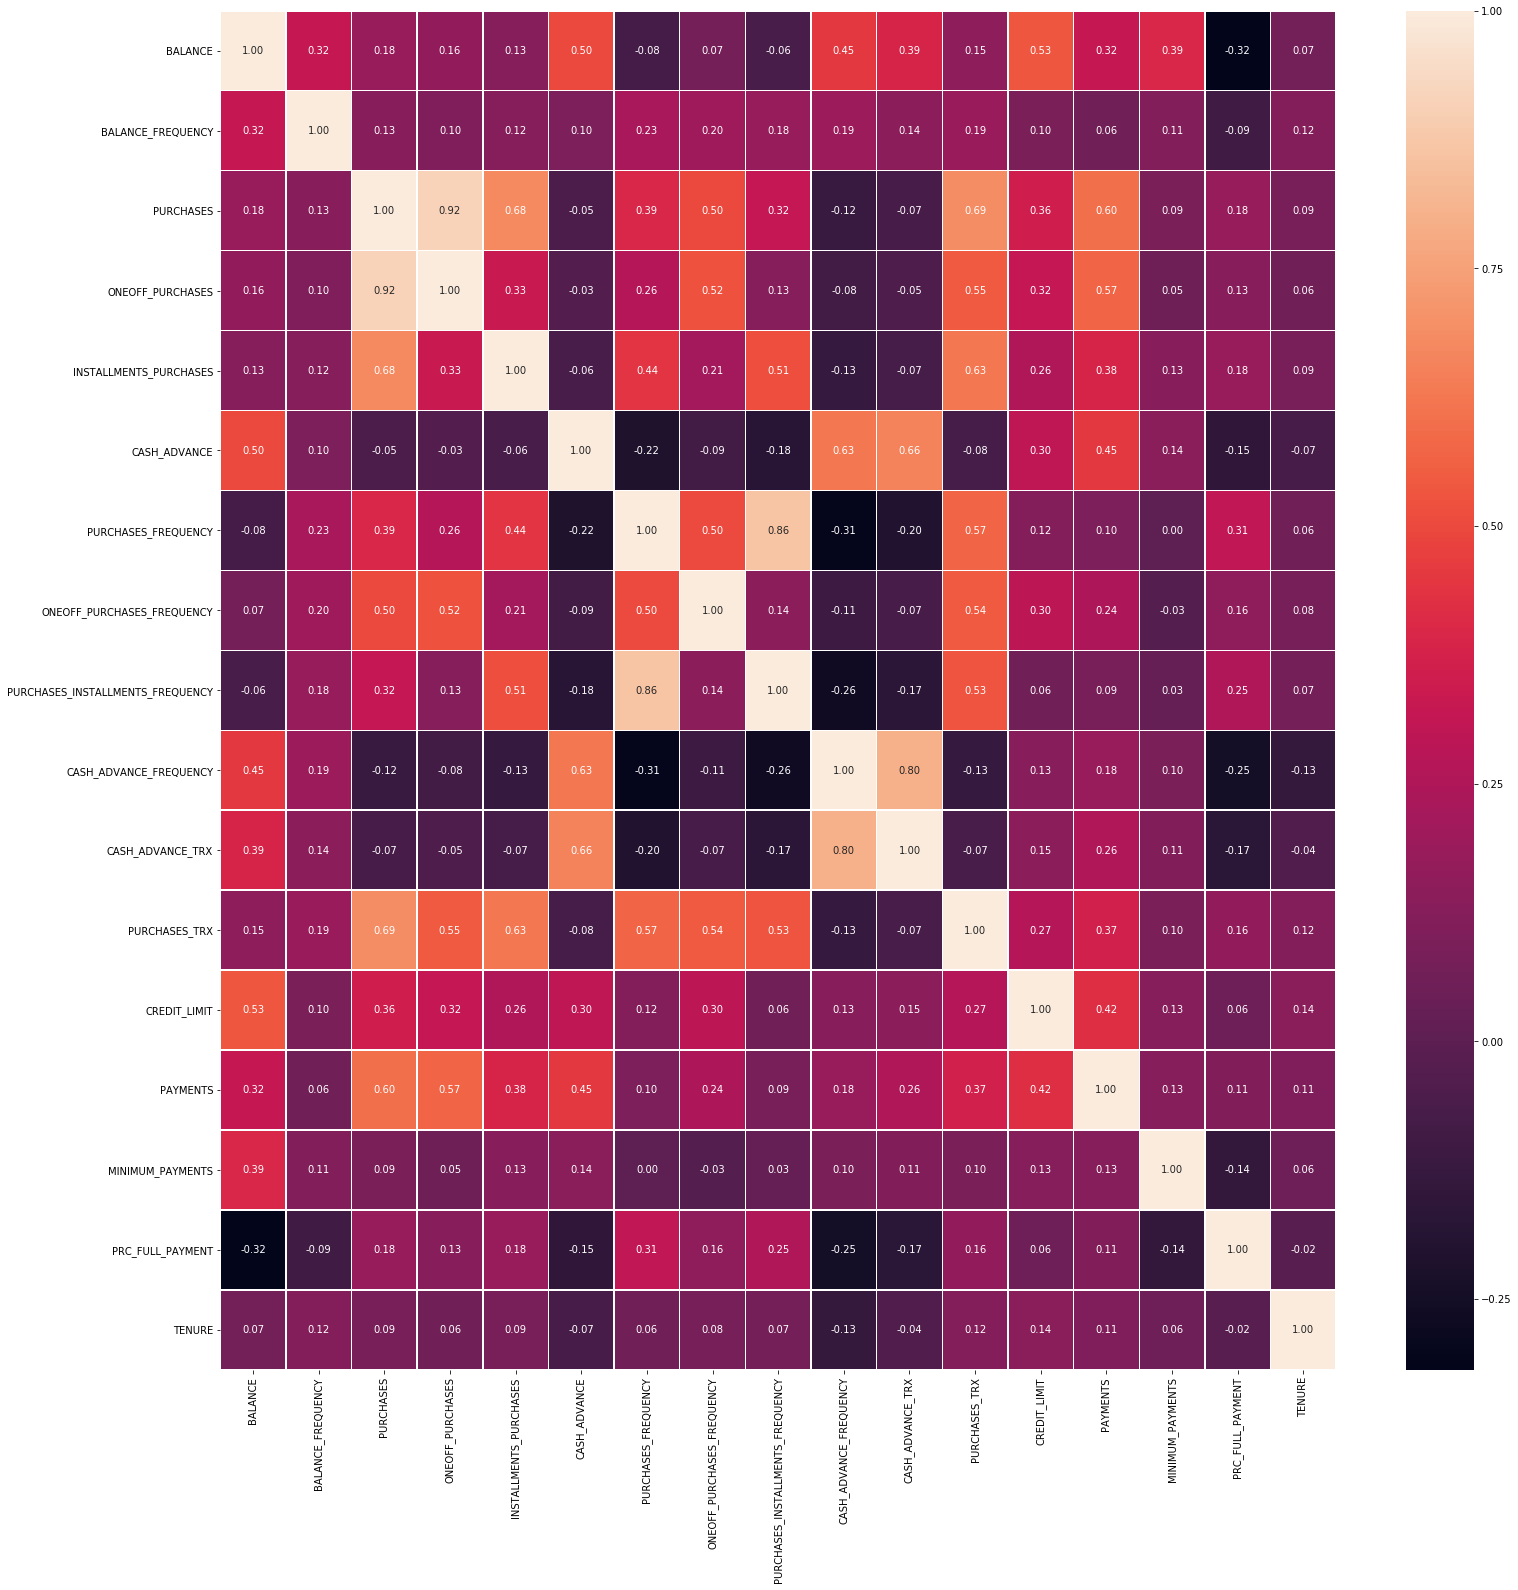

In [15]:
# look at the correlation between columns:

plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

- Balance variable has a fairly high level of correlationship with Cash Advance, Cash Advance Frequency and Credit Limit. 
- Payments variable has a fairly high level of correletionship with Purchases and Oneoff_Purchases.
- Tenure variable has a negative correlationship with Cash Advance and Cash Advance Frequence.
- Purchases variable has fairly high level of correlationship with Purchases_trx, Installments_Purchases and a high level of correlationship with oneoff_Purchases.

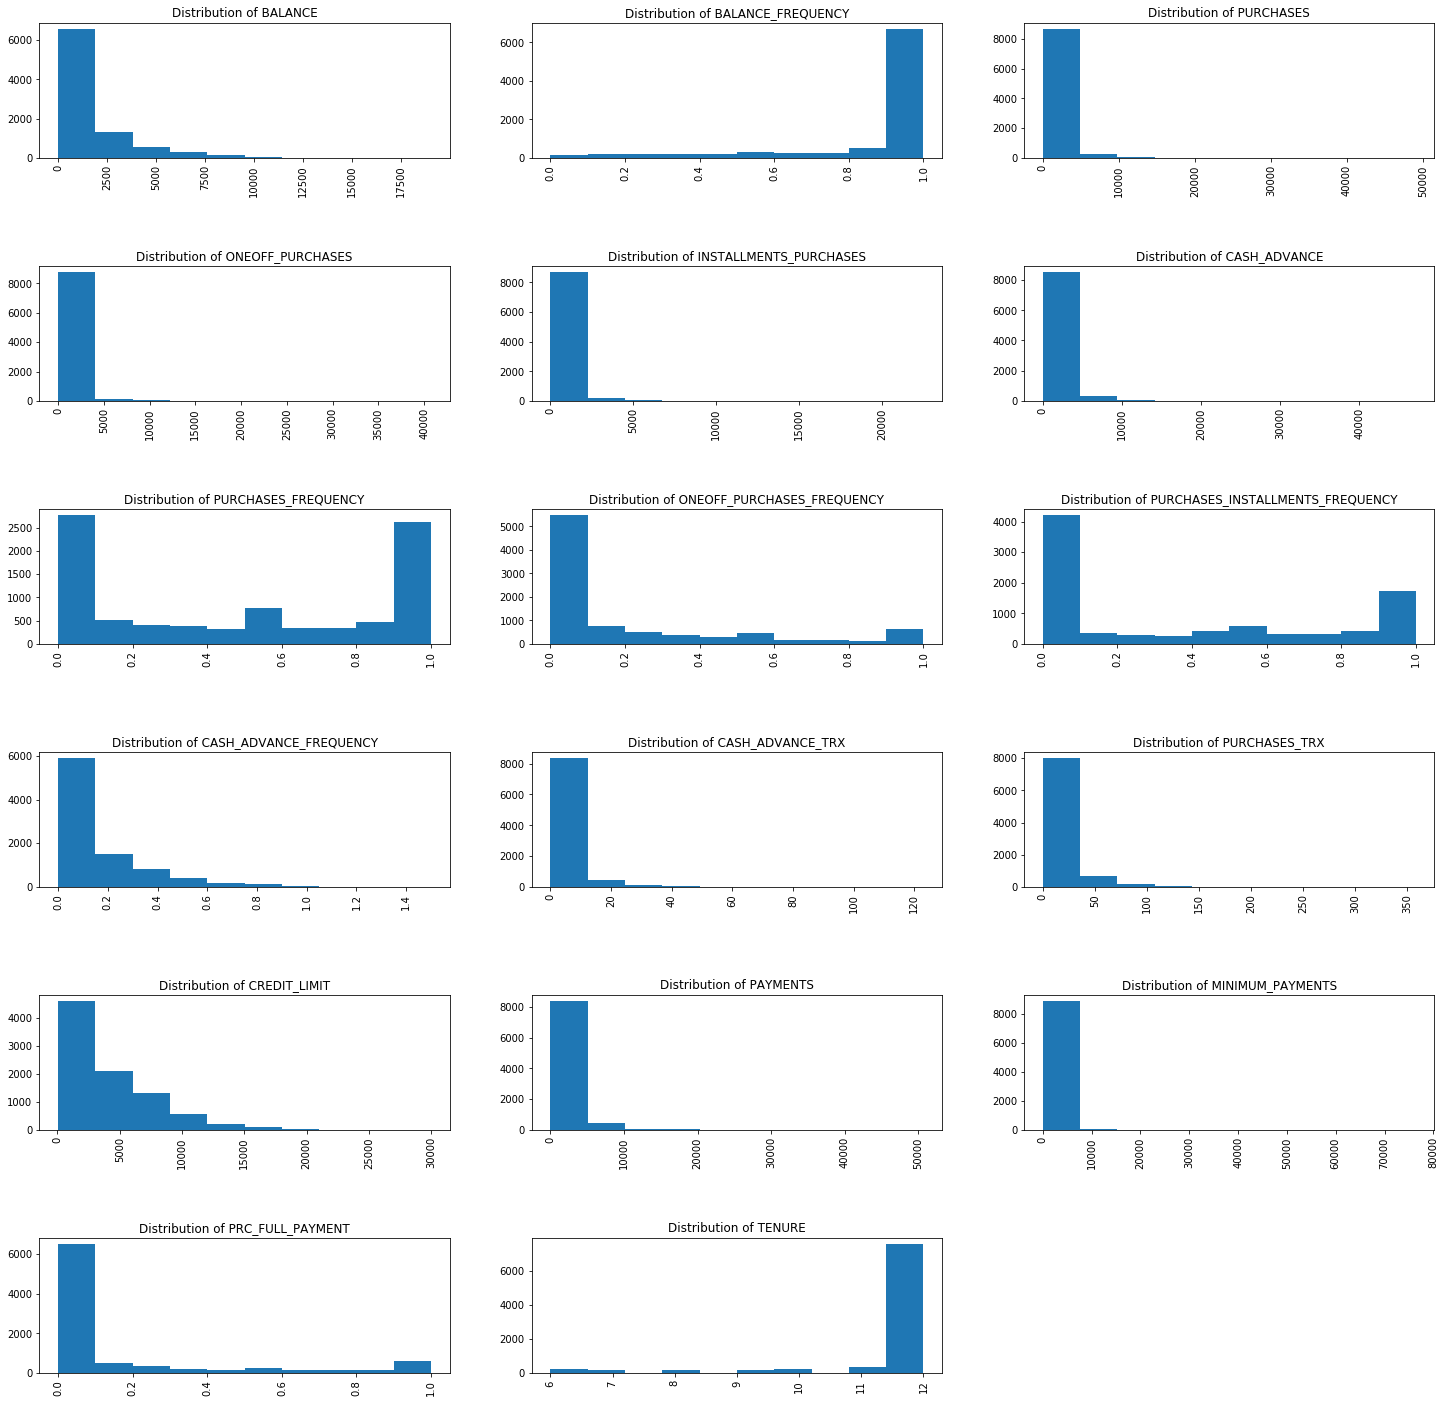

In [16]:
# Distribution of variables by using hist:

plt.figure(figsize=(25,50))
for i,col in enumerate(df):
    plt.subplot(6, 3, i+1)
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.5)
plt.show()

As you can see, all columns have not normal distribution and most of the values are in the first bin.

- BALANCE: Most of the customers have 0 balance left in their accounts to make purchases.
- BALANCE_FREQUENCY, PURCHASES_FREQUENCY: For most of the customers, their balance has been updated frequently.
- PURCHASES:For most of the customers, made purchases from their accounts is 0.
- ONEOFF_PURCHASES: For most of the customers maximum purchase done in one-go is 0.
- INSTALLMENTS_PURCHASES:For most of the customers, made purchase in installment is 0.
- CASH_ADVANCE: For most of the customers Cash in advance given by the user is 0.
- ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY: For most of the customers, these columns were not updated frequently.
- CASH_ADVANCE_TRX, PURCHASES_TRX: For most of the customers, Number of Transactions made with "Cash in Advanced" and Purchases are 0.
- CREDIT_LIMIT: For most of the customers, Limit of Credit Card for user is under 5000.
- PAYMENTS, PRC_FULL_PAYMENT: For most of the customers, amount of Payment and Percent of full payment done by user is 0.
- MINIMUM_PAYMENTS: For most of the customers, Minimum amount of payments made by user is under 1000.
- TENURE: For most of the customers,Tenure of credit card service for user is 12.

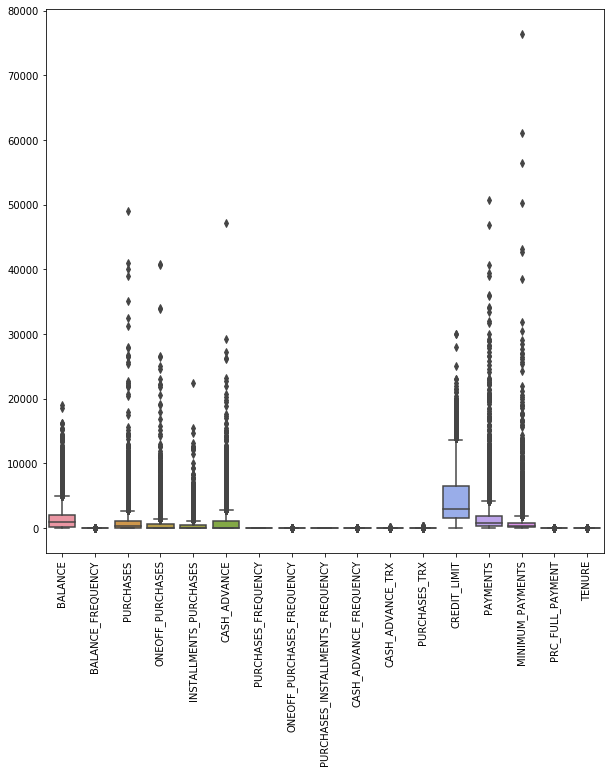

In [17]:
# Look at the Outliers by using Boxplot:

plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=90);


As shown here, all columns have outlier in one side.

In [18]:
# Make a copy of dataset:
df1 = df.copy()

In [19]:
# Removing rows higher than Threshold = 3:

z = np.abs(stats.zscore(df))
print(z)
threshold = 3
print(np.where(z > 3))
df = df[(z < 3).all(axis=1)]
df.shape

[[0.73198974 0.24214335 0.42489974 ... 0.31096747 0.52466626 0.36067954]
 [0.78696211 0.13735402 0.46955188 ... 0.08931011 0.22713151 0.36067954]
 [0.44713569 0.51685139 0.10766823 ... 0.10166525 0.52466626 0.36067954]
 ...
 [0.74039748 0.19997698 0.40196519 ... 0.3354648  0.32964939 4.12276757]
 [0.74517307 0.19997698 0.46955188 ... 0.34690461 0.32964939 4.12276757]
 [0.57257419 0.87463897 0.04214581 ... 0.33294598 0.52466626 4.12276757]]
(array([   6,   19,   20, ..., 8947, 8948, 8949], dtype=int64), array([ 3, 14, 14, ..., 16, 16, 16], dtype=int64))


(7434, 17)

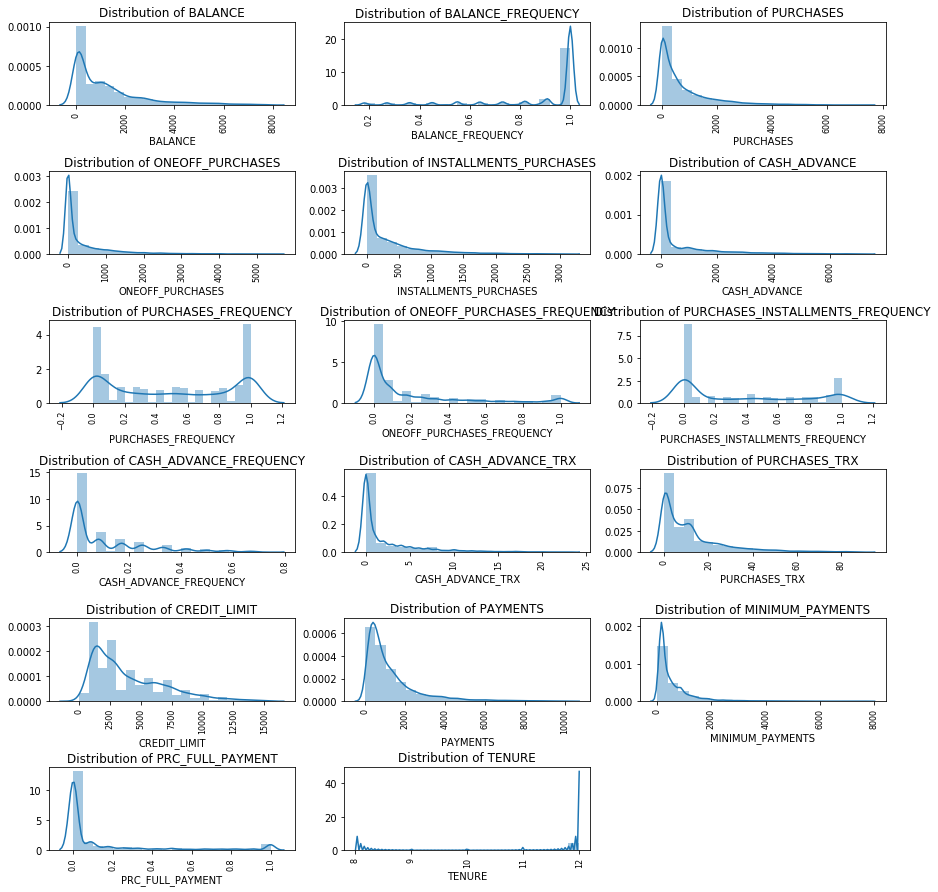

In [20]:
# Distribution of vaiables with displot:

plt.figure(figsize=(15,20))
for i,col in enumerate(df):
    plt.subplot(6, 3, i+1)
    sns.distplot(df[col] , bins = 20)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

- BALANCE: Most of the customers have 0 balance left in their accounts to make purchases.
- BALANCE_FREQUENCY, PURCHASES_FREQUENCY: For most of the customers, their balance has been updated frequently.
- PURCHASES:For most of the customers, made purchases from their accounts is 0.
- ONEOFF_PURCHASES: For most of the customers maximum purchase done in one-go is 0.
- INSTALLMENTS_PURCHASES:For most of the customers, made purchase in installment is 0.
- CASH_ADVANCE: For most of the customers Cash in advance given by the user is 0.
- ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY: For most of the customers, these columns were not updated frequently.
- CASH_ADVANCE_TRX, PURCHASES_TRX: For most of the customers, Number of Transactions made with "Cash in Advanced" and Purchases are 0.
- CREDIT_LIMIT: For most of the customers, Limit of Credit Card for user is under 5000.
- PAYMENTS, PRC_FULL_PAYMENT: For most of the customers, amount of Payment and Percent of full payment done by user is 0.
- MINIMUM_PAYMENTS: For most of the customers, Minimum amount of payments made by user is under 1000.
- TENURE: For most of the customers,Tenure of credit card service for user is 12.

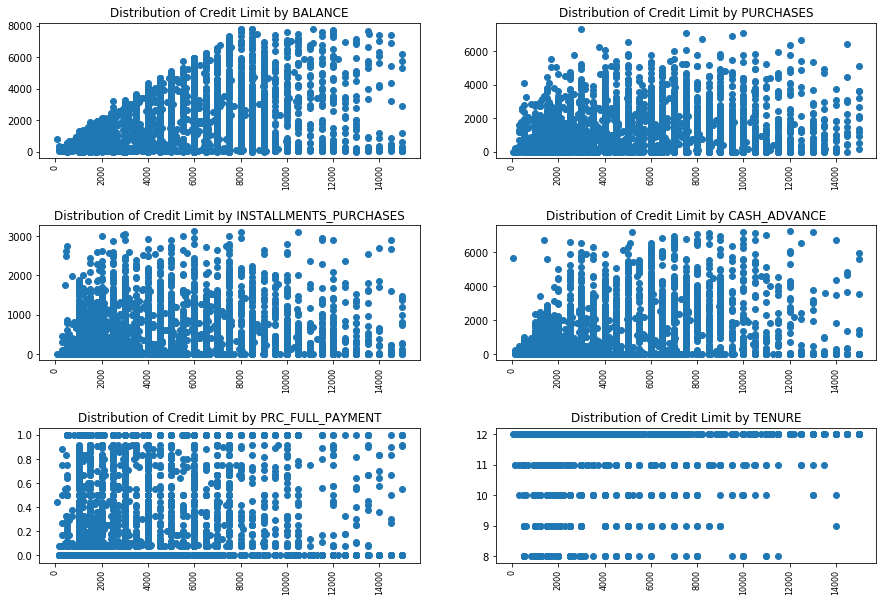

In [21]:
# Bivariate visualization of Credit Limit variable by some important variables:

plt.figure(figsize=(15,20))
cols=['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PRC_FULL_PAYMENT', 'TENURE']
for i,col in enumerate(cols):
    plt.subplot(3, 2, i+1)
    plt.scatter(x = df['CREDIT_LIMIT'], y = df[col])
    plt.title(f'Distribution of Credit Limit by {col}')
    plt.xticks(rotation=90, fontsize=8)
plt.subplots_adjust(hspace = 0.5, top = 0.5)
plt.show()

As you can see, Credit Limit has direct relationship with Balance and has some fairly direct relationship with some of the other columns.

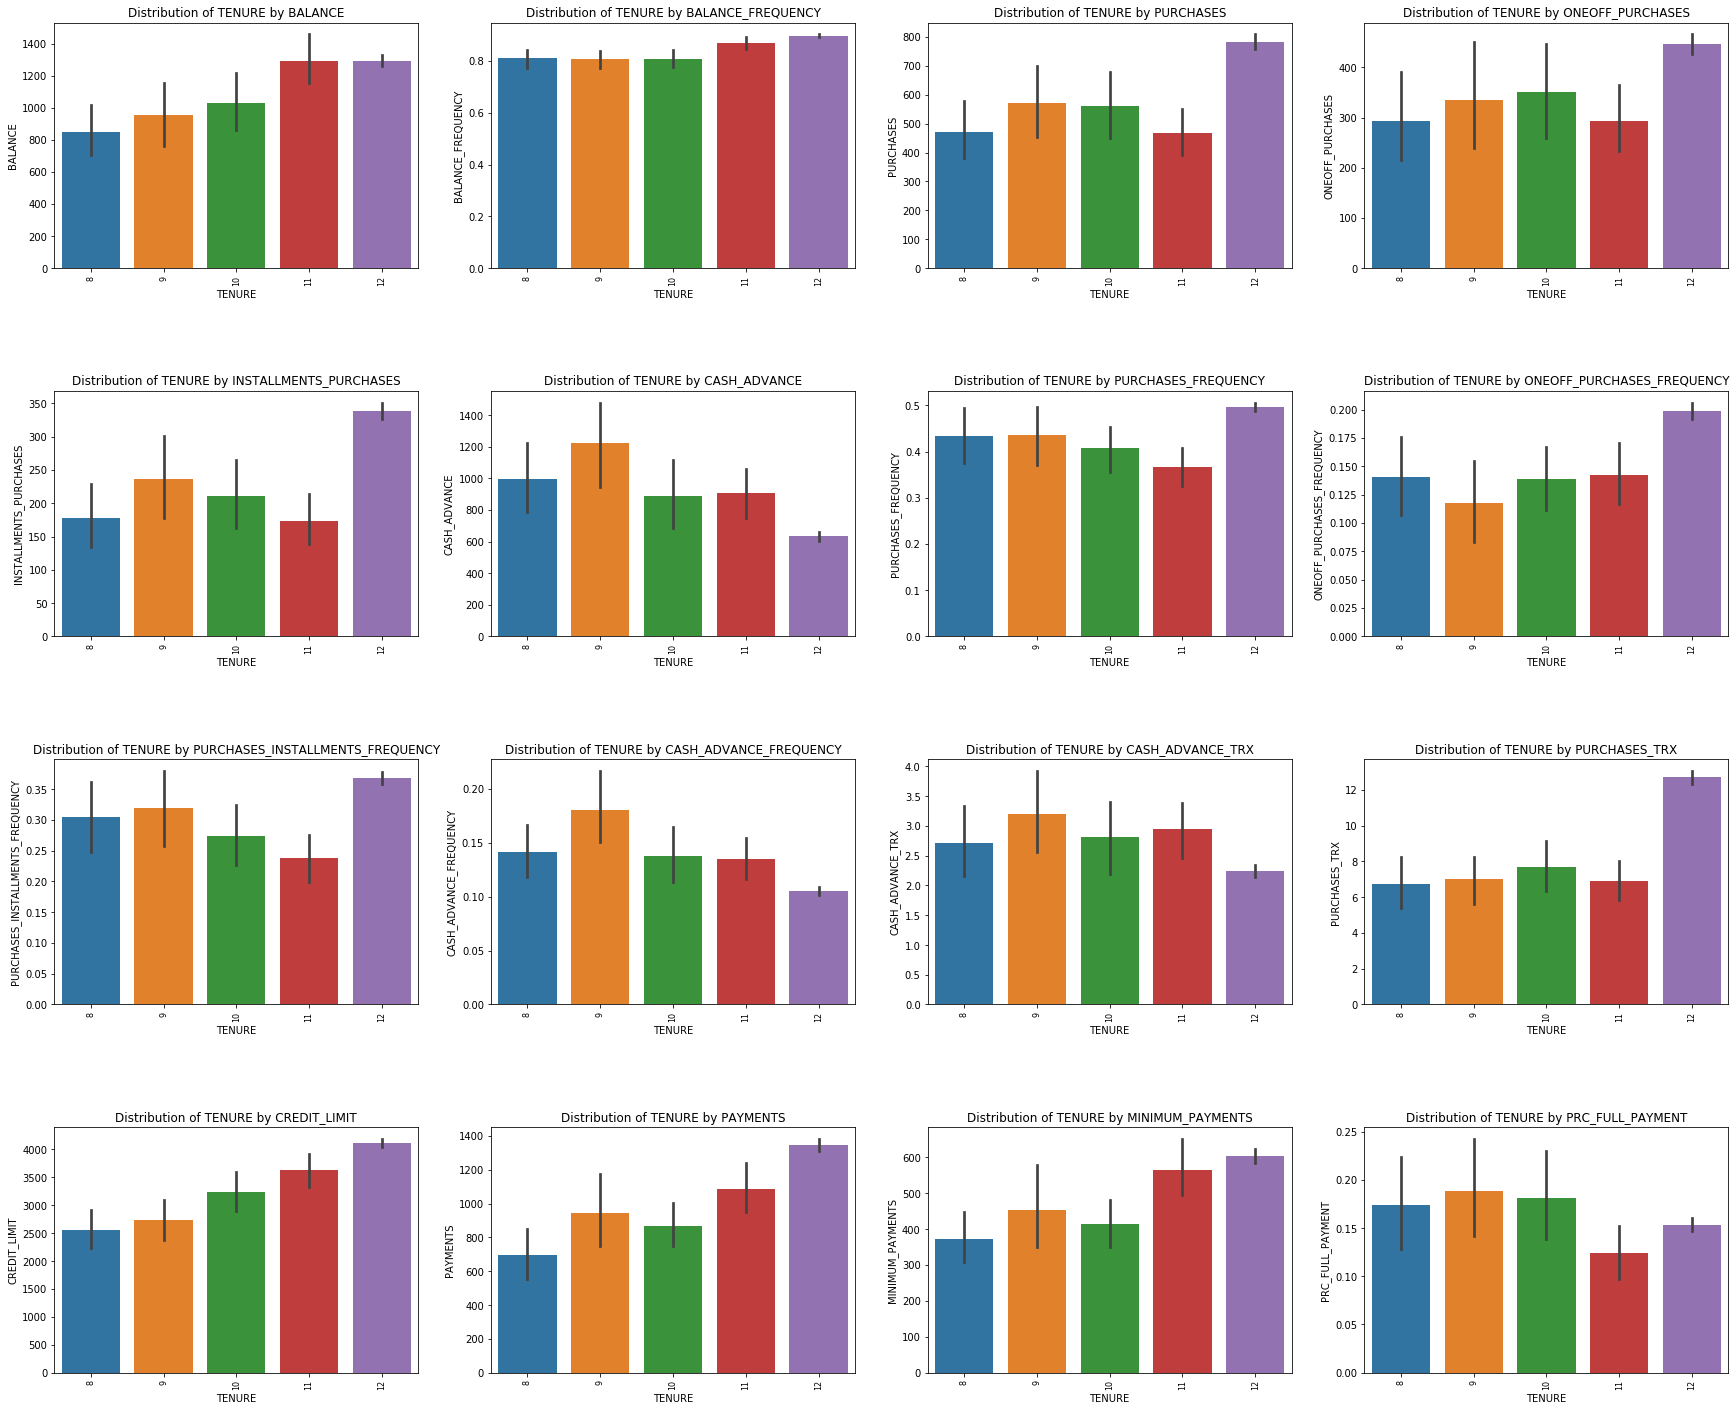

In [22]:
# Distribution of Tenure by each column:

plt.figure(figsize=(30,50))
for i,col in enumerate(df.drop('TENURE',axis=1)):
    plt.subplot(4,4,i+1)
    sns.barplot(df['TENURE'], df[col])
    plt.title(f'Distribution of TENURE by {col}')
    plt.xticks(rotation=90, fontsize=8)
    
plt.subplots_adjust(hspace =0.5, top = 0.5)
plt.show()

For most of the columns, the average values of each column increased in month 12, Except for PRC_FULL_PAYMENT, CASH_ADVANE_FREQUENCY, CASH_ADVANCE, CASH_ADVANCE_TRX which they have different trend.

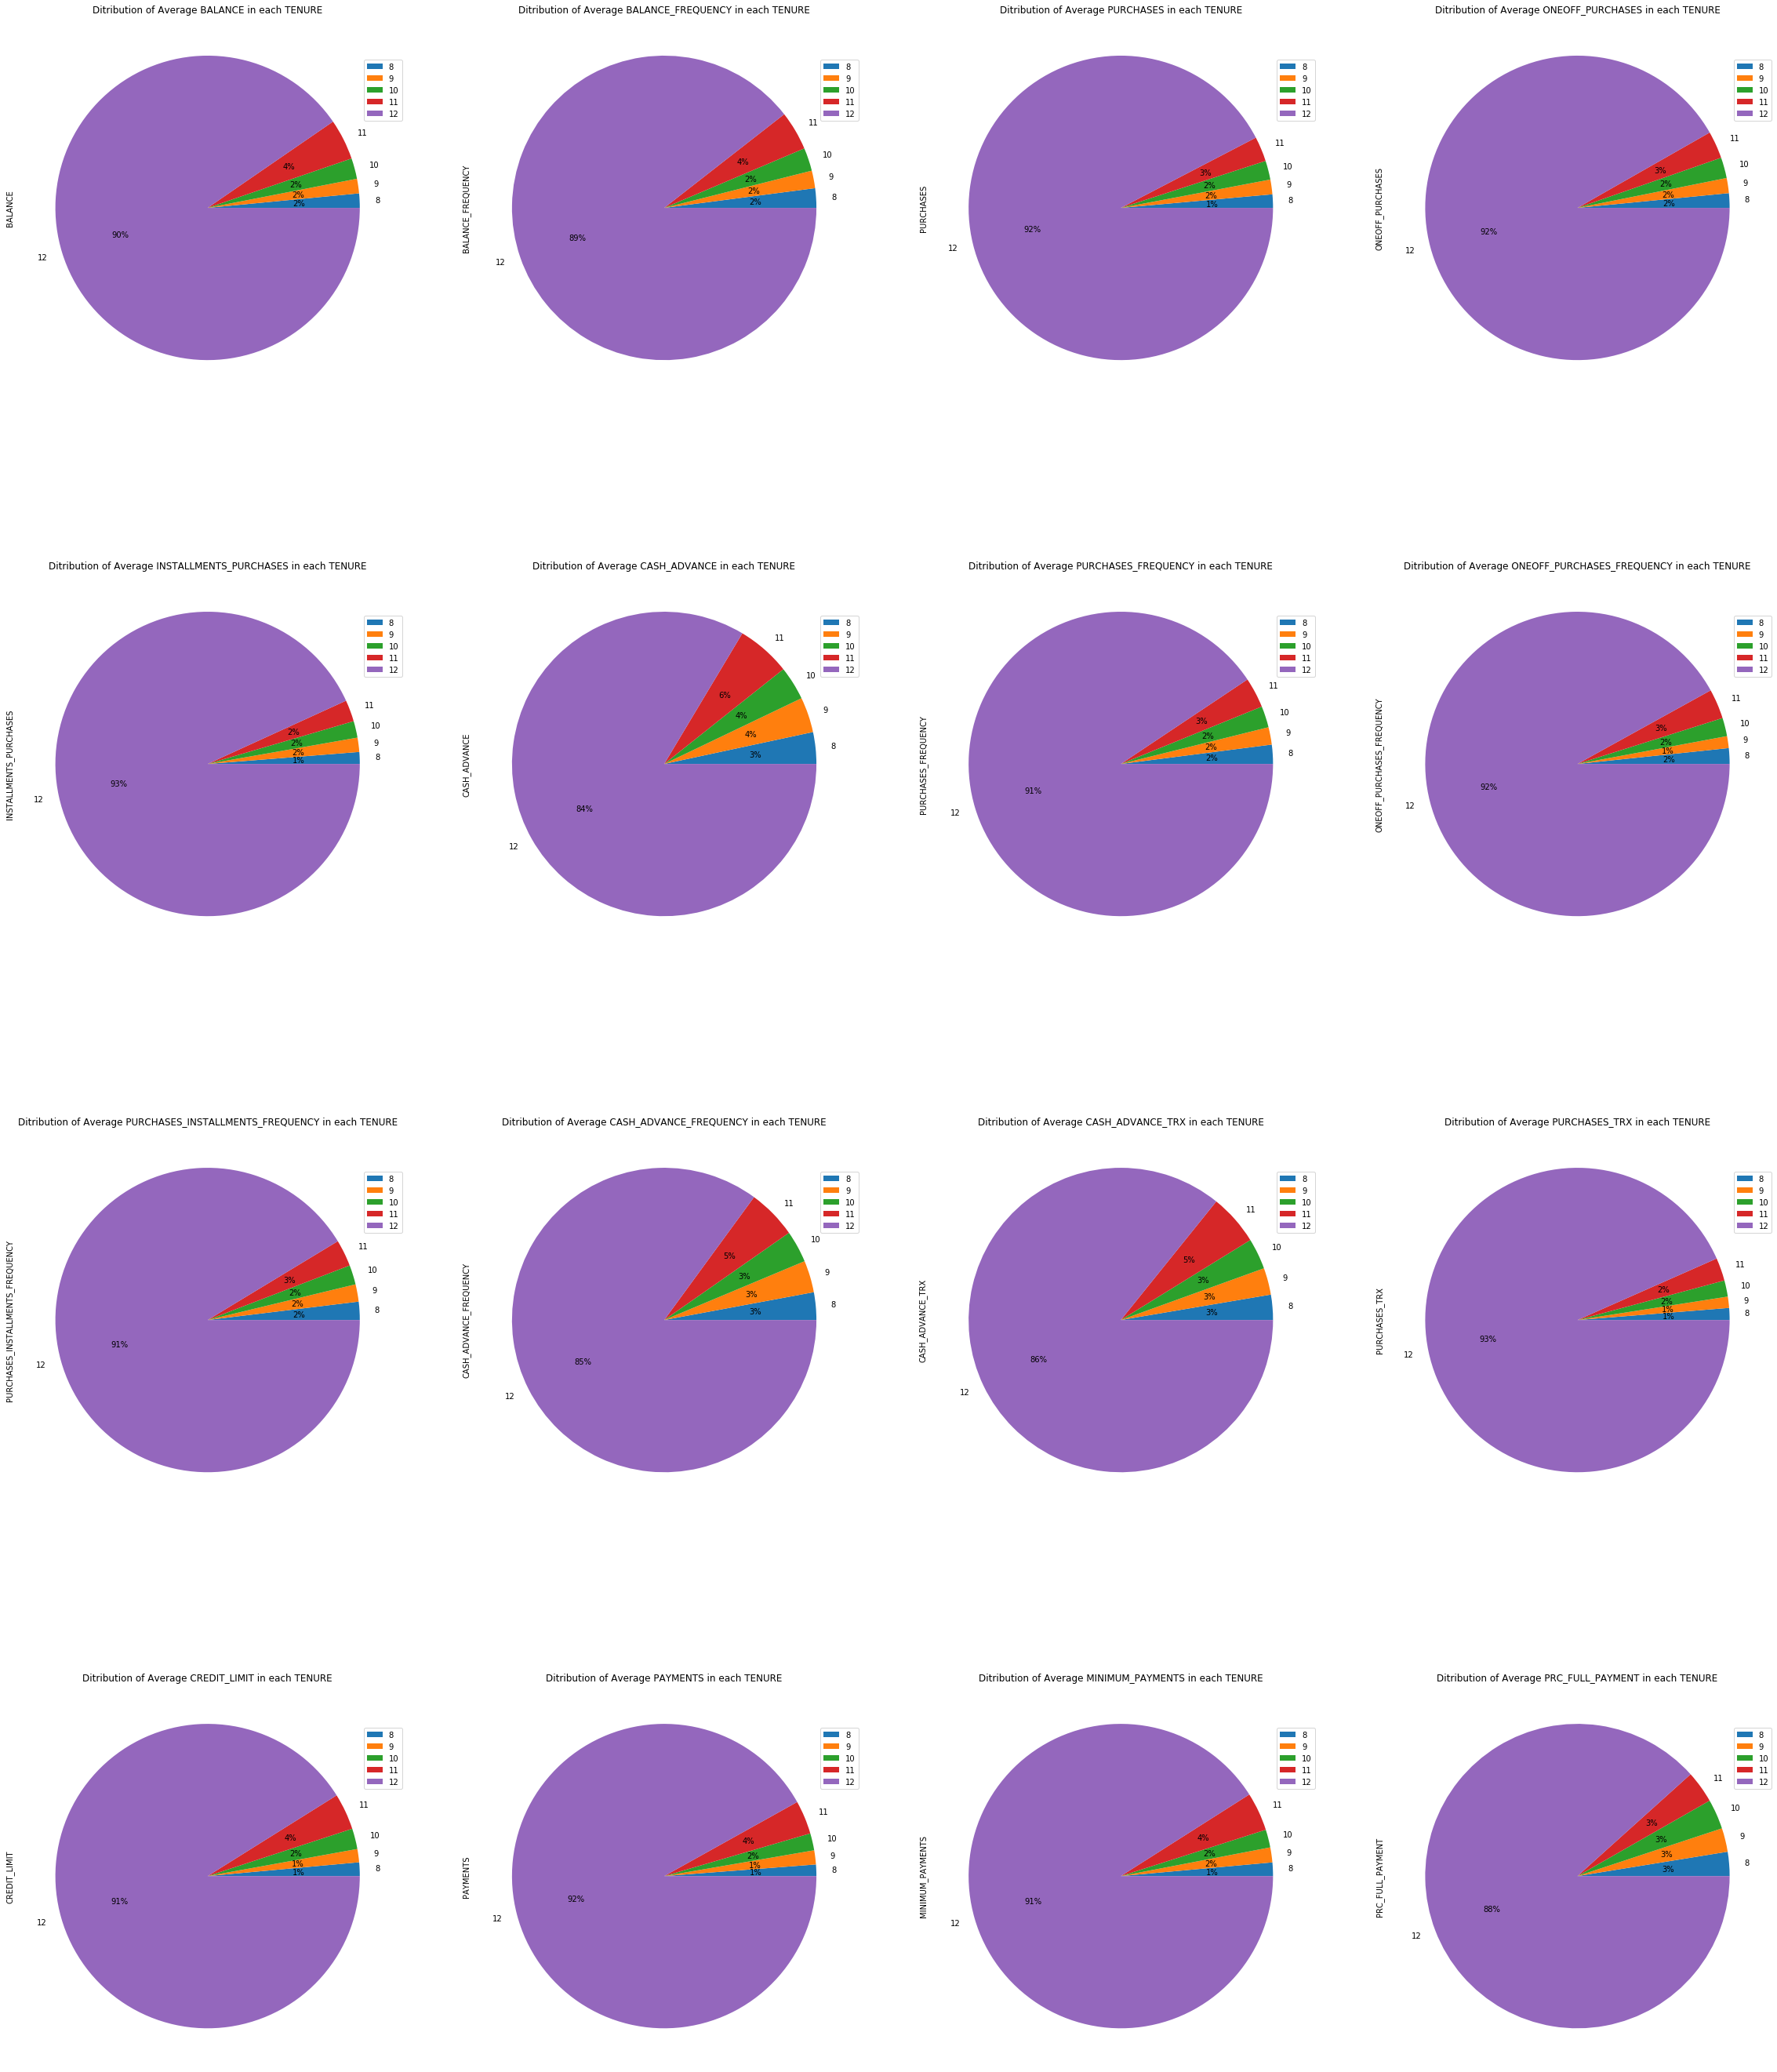

In [23]:
# Distribution of Tenure by sum values of each column:

df_tenure = df.groupby('TENURE')
plt.figure(figsize=(40,50))

for i,col in enumerate(df.drop('TENURE', axis=1)):
    plt.subplot(4,4,i+1)
    df_tenure[col].sum().plot(kind='pie',  title=(f'Ditribution of Average {col} in each TENURE'), autopct='%1.0f%%')
    labels=df_tenure[col].sum().index
    plt.legend(labels=labels, loc="upper left", prop={'size': 10}, bbox_to_anchor=(0.9,0.9))
    
plt.show()

For all columns, highest percantage of total values in each column belongs to month 12.

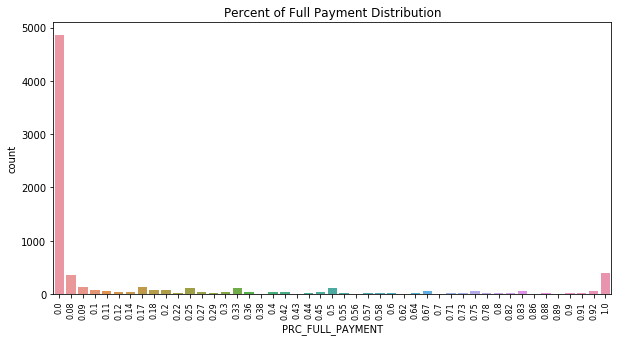

In [24]:
# Look at the distribution of Percent of Full Payment:

plt.figure(figsize=(10,5))
sns.countplot(df['PRC_FULL_PAYMENT'])
plt.title('Percent of Full Payment Distribution')
plt.xticks(rotation=90, fontsize=8)
plt.show()

As shows above, highest Percent of full payment done by user is 0.

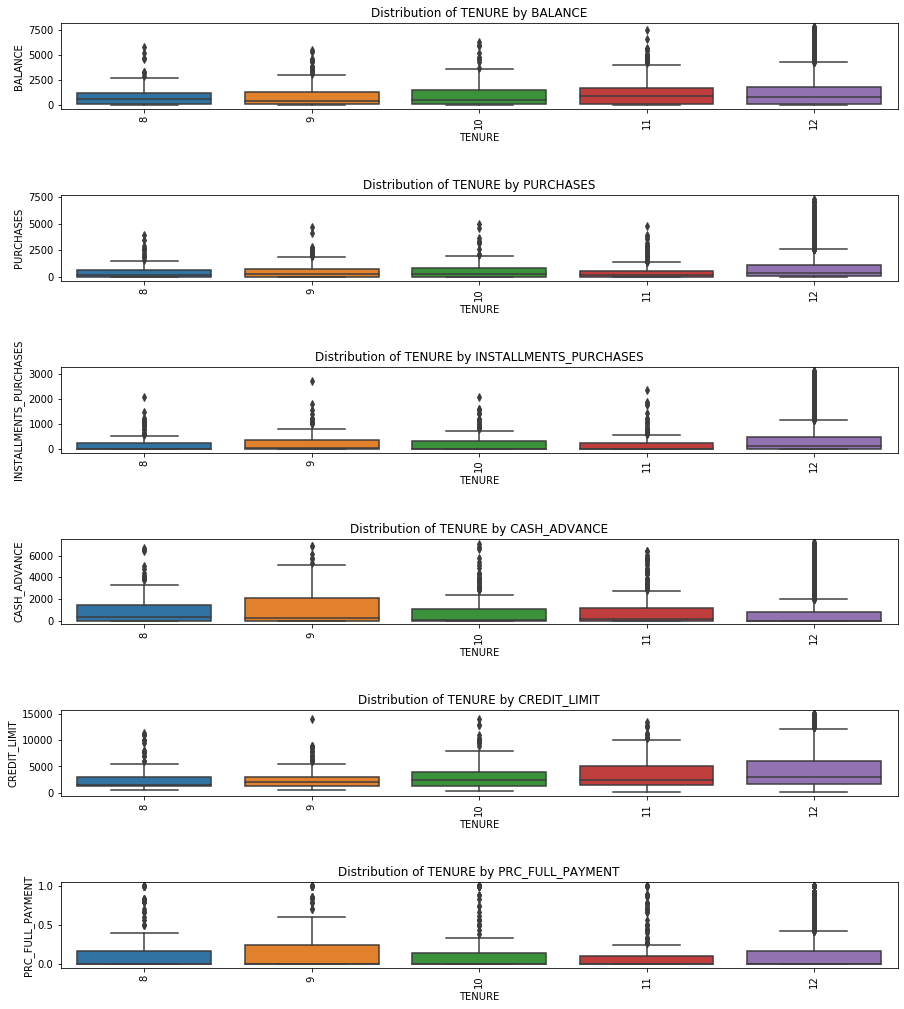

In [25]:
# Using boxplot to distribution of duration and attack_cat by label: 

plt.figure(figsize=(15,15))

cols = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']

for i,col in enumerate(cols):
    plt.subplot(6, 1, i+1)
    sns.boxplot(x='TENURE', y=col, data=df)
    plt.title(f'Distribution of TENURE by {col}')
    plt.xticks(rotation=90, fontsize=10)


plt.subplots_adjust(hspace =1, top = 1)
plt.show()

- The Average value of BALANCE has an increased trend by TENURE and has the highest average value in month 12. 
- The Average value of PURCHASES has decreased in months 10 and 11, but it has the highest average value in month 12.
- The Average value of PURCHASES_INSTALLMENTS has decreased in months 10 and 11, but it has the highest average value in month 12.
- The highest average value of CASH_ADVANCE is in month 9.
- The Average value of CREDIT_LIMIT has an increased trend by TENURE and has the highest average value in month 12.
- The highest average value of PRC_FULL_PAYMENT is in month 9.

In [26]:
# Standardize dataset without outliers:
scaler = StandardScaler() 
x = scaler.fit_transform(df) 
x = normalize(x) 

In [27]:
# Standardize the dataset with outliers:
scaler = StandardScaler() 
x1 = scaler.fit_transform(df1) 

**- Illustrate dataset by using Dimensional Reduction:** 
- PCA
- TSNE
- UMAP


1. Applying PCA:

In [28]:
# Applying PCA Dimensional Reduction :

time_start = time.time()
pca = PCA(n_components=2).fit(x)
pca_transform = pca.transform(x)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.027927875518798828 seconds


PCA time elapsed is very low.

In [29]:
# PCA components:
print(abs( pca.components_ )) 

[[0.10949098 0.01809989 0.29008477 0.17434438 0.31453289 0.14799529
  0.49474378 0.21493705 0.43940857 0.22389334 0.17536918 0.35649062
  0.10382599 0.08014486 0.04037282 0.20345969 0.00769535]
 [0.41046251 0.20406453 0.19532205 0.20093535 0.08059695 0.33980129
  0.03034736 0.20899334 0.03424468 0.38219075 0.35157721 0.15223083
  0.27915071 0.29592661 0.27515036 0.09229247 0.03234174]]


In [30]:
# Print the Percentage of total variance in the dataset explained by each components:

var_exp = pca.explained_variance_ratio_
print(
    'The percentage of total variance in the dataset explained by each component from Sklearn PCA.\n',
    var_exp ,pca.explained_variance_ratio_.sum() 
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.28460931 0.18881392] 0.473423232062109


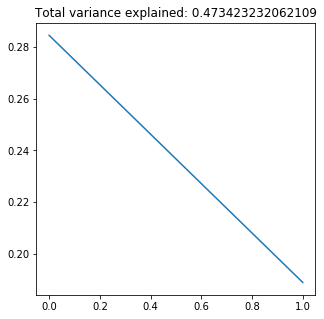

In [31]:
# Plot the variance exolained with PCA:
plt.figure(figsize = (5,5))
plt.plot(var_exp)
plt.title('Total variance explained: {}'.format(var_exp.sum()))
plt.show()

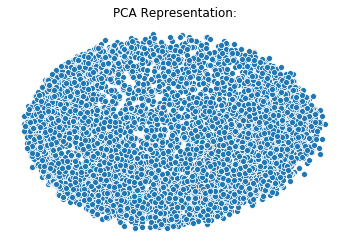

In [32]:
# Applying Scatter plot with PCA:

sns.scatterplot(pca_transform[:, 0], pca_transform[:, 1])
plt.title('PCA Representation:')
plt.axis('off')
plt.show()

Unfortunately it is not quite possible to find each cluster and we need to find a better method to achieve this.

2. Applying TSNE:

In [33]:
# Applying TSNE Dimensional Reduction:

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(x)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7434 samples in 0.015s...
[t-SNE] Computed neighbors for 7434 samples in 3.395s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7434
[t-SNE] Computed conditional probabilities for sample 2000 / 7434
[t-SNE] Computed conditional probabilities for sample 3000 / 7434
[t-SNE] Computed conditional probabilities for sample 4000 / 7434
[t-SNE] Computed conditional probabilities for sample 5000 / 7434
[t-SNE] Computed conditional probabilities for sample 6000 / 7434
[t-SNE] Computed conditional probabilities for sample 7000 / 7434
[t-SNE] Computed conditional probabilities for sample 7434 / 7434
[t-SNE] Mean sigma: 0.248974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.147118
[t-SNE] KL divergence after 300 iterations: 1.809776
t-SNE done! Time elapsed: 48.935707092285156 seconds


In PCA time elapsed is much less than TSNE.

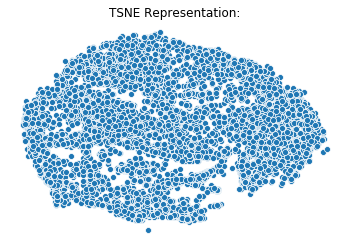

In [34]:
# Applying scatter plot with TSNE:

sns.scatterplot(tsne_results[:, 0], tsne_results[:, 1])
plt.title('TSNE Representation:')
plt.axis('off')
plt.show()

We can identify classes quite well in contrast to PCA representation. 

3. Applying UMAP:

In [35]:
# Apply UMAP Dimensional Reduction:

time_start = time.time()
umap_results = umap.UMAP(n_neighbors=5, min_dist=0.29, metric='correlation').fit_transform(x)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 18.417407751083374 seconds


In PCA time elapsed is much less than TSNE and UMAP. Also, UMAP time elapsed is much less than TSNE.

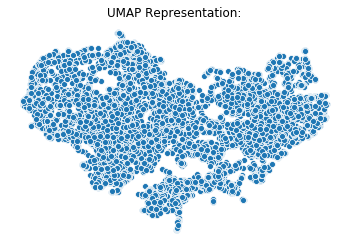

In [36]:
# Applying scatter plot with UMAP:

sns.scatterplot(umap_results[:, 0], umap_results[:, 1])
plt.title('UMAP Representation:')
plt.axis('off')
plt.show()

We can identify classes quite well in contrast to TSNE and PCA representation. 

**Clustering Methods**

- Kmeans 
- Hierarchical clustering
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)DBSCAN
- Clustering with Gaussian Mixture Models (GMM)

**1. Applying The KMeans approach to clustering:**

In [37]:
# Make copy of dataset:
x_cluster=df.copy()

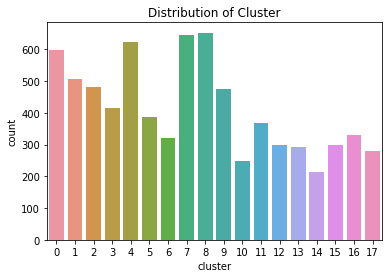

In [38]:
# Defining the k-means and fit the model:

kmeans_cluster = KMeans(n_clusters=18, random_state=123)
y_pred = kmeans_cluster.fit_predict(x)

# Adding prediction of the clustering to the Kmeans dataframe:

x_kmeans= pd.DataFrame(x_cluster)

x_kmeans["cluster"] = y_pred
cols = list(x_kmeans.columns)

# Plot distribution of clusters:
sns.countplot(x='cluster', data=x_kmeans)
plt.title("Distribution of Cluster")
plt.show()

Number of customers per cluster is different in each cluster. Number of customers per cluster is highest in the cluster 9.

- Finding the Best Number of Clusters with Elbow Method:

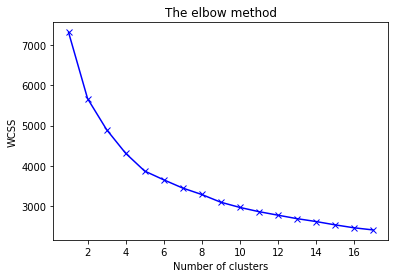

In [39]:
# Finding the optimum number of clusters for k-means classification:

wcss = []

for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow':

plt.plot(range(1, 18), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')               
plt.show()



Based on the Elbow plot, the best number of clusters is 4.

471 ms ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


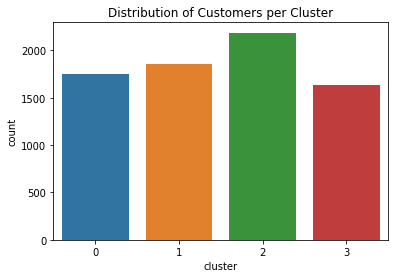

In [84]:
# Defining the k-means:
kmeans_cluster = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(x)

y_pred = kmeans_cluster.fit_predict(x)

x_kmeans["cluster"] = y_pred
cols = list(x_kmeans.columns)

# Plotting a count graph:
sns.countplot(x='cluster', data=x_kmeans)
plt.title("Distribution of Customers per Cluster")
plt.show()

Number of customers per cluster is almost the same. Number of customers per cluster is highest in the cluster 2.

- Now, we can plot the kmeans with PCA, TSNE and UMAP. I did plot with PCA because it is much faster.

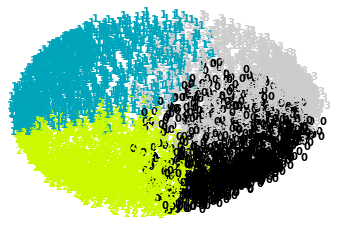

In [41]:
# plot our dataset of k-means in two-dimensional space with PCA: 

plt.figure(figsize=(3,2))
cmap=plt.cm.get_cmap('nipy_spectral',4)
pca = PCA(n_components=2).fit_transform(x) 

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=cmap((x_kmeans['cluster']).iloc[i]),
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.axis('off')
plt.show()

By applying k-means clustering on dataset, plottingg with PCA and coloring each cluster, we can easily distinguish each cluster.

- In order to observe consistency across subsamples, we divide the dataset into two random samples:

In [42]:
# Split the data into four equally-sized samples. First we break it in half:

pca = PCA(n_components=2).fit_transform(x)

X_half1, X_half2, pca_half1, pca_half2 = train_test_split(x, pca, test_size=0.5, random_state=123)

In [43]:
# Data frame to store features and predicted cluster memberships:

ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go through the loop:

for counter, data in enumerate([(X_half1, pca_half1), (X_half2, pca_half2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

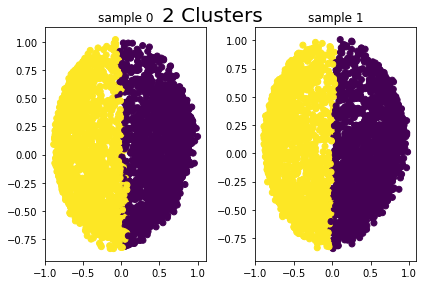

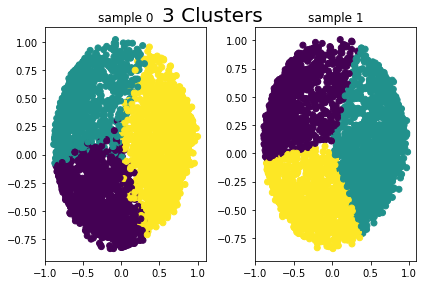

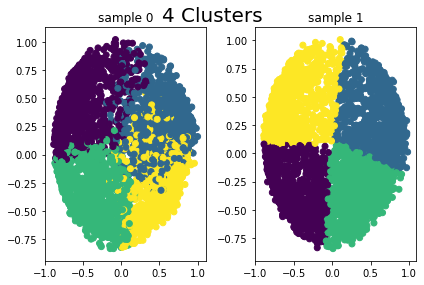

In [44]:
# visualize our dataset of K-means clustering Algorithm in two-dimensional space with PCA for different number of clusters: 

for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # UMAP-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]

        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')####??????????

According to the Elbow plot, the best number of clusters is for 4 clusters as shown in the plot, but the above plot only shows 2 and 3 number of clusters are consistent. So I utilised silhouette scores to find the best one. 

Silhouette score for 2 cluster k-means: 0.21802245674103227
Silhouette score for 3 cluster k-means: 0.19847664676728613
Silhouette score for 4 cluster k-means: 0.20142404617878296
Silhouette score for 5 cluster k-means: 0.21431846706019125
Silhouette score for 6 cluster k-means: 0.20328508181587981


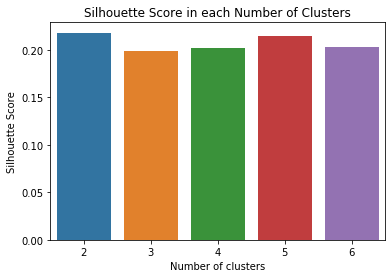

In [83]:
# Calculate Silhouette score for different number of clusters:

silhouette_scores = []
num_clusters_list = []
for n_clusters in range(2,7):
    cluster = KMeans (n_clusters=n_clusters, random_state=123)
    preds = cluster.fit_predict(x)
    centers = cluster.cluster_centers_
    print("Silhouette score for {} cluster k-means: {}".format(n_clusters,metrics.silhouette_score(x, preds, metric='euclidean')))

    silhouette_scores.append(metrics.silhouette_score (x, preds, metric='euclidean'))
    num_clusters_list.append(n_clusters)

    
# Plotting a bar graph to compare the results: 
sns.barplot(num_clusters_list, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('Silhouette Score in each Number of Clusters')
plt.show()

According to the results, the best solution is for the 2 clusters as its silhouette score is the highest.

264 ms ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.21802245674103227


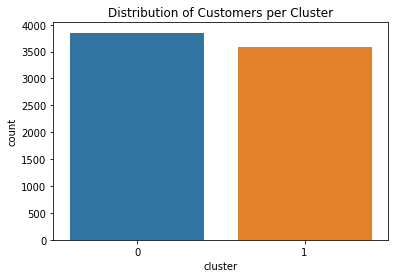

In [85]:
# Defining the k-means:
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model:
%timeit kmeans_cluster.fit(x)
y_pred = kmeans_cluster.fit_predict(x)
print(metrics.silhouette_score (x, y_pred, metric='euclidean'))

x_kmeans["cluster"] = y_pred
cols = list(x_kmeans.columns)

# Plotting a count graph:
sns.countplot(x='cluster', data=x_kmeans)
plt.title("Distribution of Customers per Cluster")
plt.show()

Number of customers per cluster is almost the same. Number of customers per cluster is highest in the cluster 0.

In [47]:
# Calculate the average value of each column in each cluster:
x_kmeans.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,"$1,542.42",$0.86,$210.53,$164.83,$45.91,"$1,052.13",$0.15,$0.08,$0.07,$0.17,$3.60,$2.54,"$3,662.41","$1,125.75",$646.84,$0.05,$11.71
1,$976.85,$0.93,"$1,336.30",$717.65,$618.97,$263.35,$0.85,$0.32,$0.67,$0.05,$0.93,$22.29,"$4,362.01","$1,482.23",$524.95,$0.26,$11.80


According to the results:

- Cluster 0: These customers of the cluster indicates a group of customers who have a high BALANCE and CASH_ADVANCE	with low PURCHASES and PURCHASES_FREQUENCY. We can assume that these customers have the least usage of credit card. The number of customers in this cluster is a bit higher.

- Cluster 1: These customers of the cluster indicate a group of customers who have high PURCHASES and PURCHASES_FREQUENCY with the high PURCHASES_INSTALLMENTS_FREQUENCY. We can assume that these customers have more usage of credit card and makes more frequent purchases of the products.

**- Apllying another option of kmeans called MiniBatchkmeans:**

In [48]:
# Defining the mini-batch k-means:

minikmeans_cluster = MiniBatchKMeans(n_clusters=2, random_state=123)

# Fit model
%timeit minikmeans_cluster.fit(x)

minikmeans_cluster = minikmeans_cluster.fit_predict(x)

metrics.silhouette_score (x, minikmeans_cluster, metric='euclidean')

35.7 ms ± 4.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


0.216231351061534

MiniBatchkmeans time elapsed is much less than Kmeans, but their silhouette scores are almost the same.

**2. Applying Hierarchical Clustering approach to clustering:**

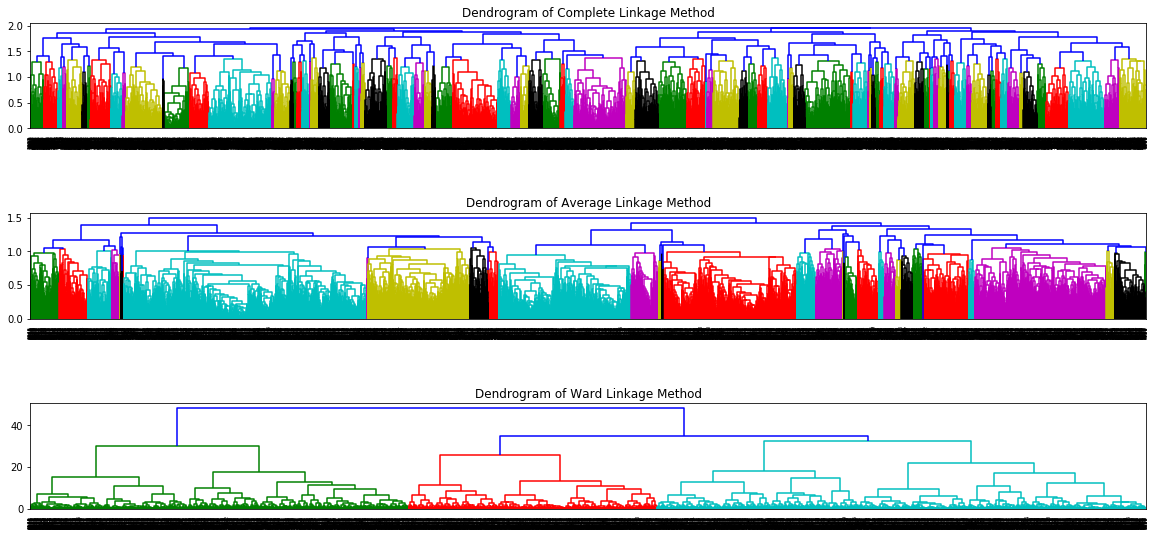

In [49]:
# Sketch the dendrogram using the different linkage method.

plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
dendrogram(linkage(x, method='complete'))
plt.title('Dendrogram of Complete Linkage Method')

plt.subplot(3,1,2)
dendrogram(linkage(x, method='average'))
plt.title('Dendrogram of Average Linkage Method')

plt.subplot(3,1,3)
dendrogram(linkage(x, method='ward'))
plt.title('Dendrogram of Ward Linkage Method')

plt.subplots_adjust(hspace = 0.8, top = 0.8)
plt.show()

I think the ward linkage method produces more reasonable result, because The number of observation for each cluster is almost the same, but two other linkage methods have too few observations for one of the clusters.

In [50]:
# Finding best number of clusters by calculating Silhouette score for different number of clusters and linkage methods:

silhouette_list_hierarchical = [] 

for cluster in range(2,18):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(x)
        silhouette_score = metrics.silhouette_score(x, agglomerative, metric='euclidean')
        silhouette_list_hierarchical.append((silhouette_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(silhouette_list_hierarchical, columns=['silhouette_score_agglomerative','linkage_method_agglomerative', 'number_of_clusters_agglomerative'])
df_hierarchical.sort_values(by='silhouette_score_agglomerative', ascending=False).head(5)#??????????

,silhouette_score_agglomerative,linkage_method_agglomerative,number_of_clusters_agglomerative
1,$0.17,average,2
7,$0.16,average,4
0,$0.16,ward,2
12,$0.16,ward,6
19,$0.16,average,8


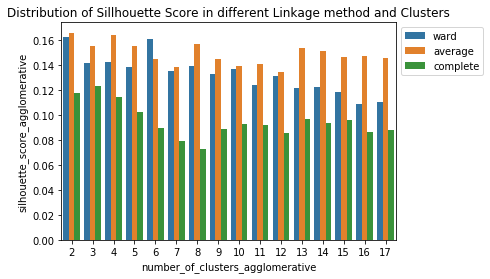

In [51]:
# PLot the above result:

sns.barplot(x=df_hierarchical['number_of_clusters_agglomerative'], y=df_hierarchical['silhouette_score_agglomerative'], hue =df_hierarchical['linkage_method_agglomerative'], data=df_hierarchical)
plt.title('Distribution of Sillhouette Score in different Linkage method and Clusters')
plt.legend(loc="upper left", prop={'size': 10}, bbox_to_anchor=(1,1))
plt.show()

According to the plot, The highest number of silhouette score is for number of clusters 2 with Average linkage method. Based on the dendogram, the ward linkage has better distribution, so we choose the ward one with 2 clusters.????????

In [52]:
# Defining the agglomerative clustering:
agg_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)

# Fit model
%timeit agg_cluster.fit(x)

y_pred = agg_cluster.fit_predict(x)

print(metrics.silhouette_score (x, y_pred, metric='euclidean'))

3.23 s ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.16256537195543566


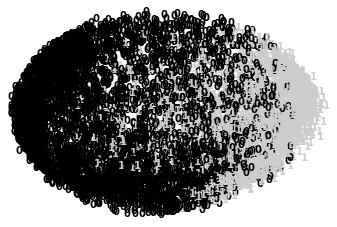

In [53]:
# visualize our dataset of Hierarchical clustering Algorithm in two-dimensional space with PCA: 

plt.figure(figsize=(3,2))
pca = PCA(n_components=2).fit_transform(x)

cmap=plt.cm.get_cmap('nipy_spectral', 2)

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),color=cmap(y_pred[i]),fontdict={'weight': 'bold', 'size': 10})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

By applying Hierarchical clustering on dataset, plotting with PCA and coloring each cluster, each cluster can easily be identified. But as you can see, density is  much in the one cluster and lower number of variables in other clusters. Agglomerativetime time elapsed is much higher than MiniBatchKMeans and Kmeans. 

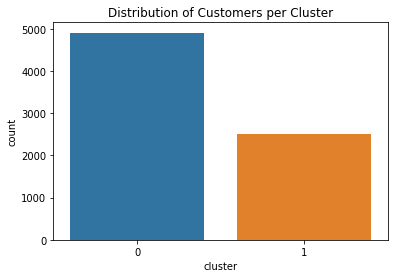

In [86]:
# Plot the result:
x_Agglomerative= pd.DataFrame(x_cluster)

agg_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
y_pred = agg_cluster.fit_predict(x)
x_Agglomerative["cluster"] = y_pred
cols = list(x_Agglomerative.columns)

sns.countplot(x='cluster', data=x_Agglomerative)
plt.title("Distribution of Customers per Cluster")
plt.show()

According to the plot, distribution of customers per cluster is higher in cluster 0,so density is much in the cluster 0.

In [55]:
# Calculate the Average values of columns in each cluster:
x_Agglomerative.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,"$1,452.10",$0.85,$372.73,$213.63,$159.37,$957.80,$0.29,$0.10,$0.20,$0.15,$3.27,$5.83,"$3,755.17","$1,200.98",$666.74,$0.10,$11.64
1,$914.62,$0.97,"$1,494.45",$855.42,$639.26,$114.90,$0.87,$0.38,$0.66,$0.03,$0.45,$24.19,"$4,475.94","$1,485.80",$434.82,$0.27,$11.97


According to the results:

- Cluster 0: These customers of the cluster indicates a group of customers who have a high BALANCE and with low PURCHASES and PURCHASES_FREQUENCY with the low PURCHASES_INSTALLMENTS_FREQUENCY. We can assume that these customers with least usage of credit card. The number of customers in this cluster is a lower.


- Cluster 1: These customers of the cluster indicates a group of customers who have a low BALANCE and CASH_ADVANCE	with high PURCHASES and PURCHASES_FREQUENCY. We can assume that these customers with high usage of credit card. The number of customers in this cluster is higher.

**3. Applying The DBSCAN approach to clustering:**

- DBScan Clustering is basically a cluster method that uses Density based methods rather than distance based clustering in K-Means and HC.

- DBSCAN can also identify outliers in the data which means it's not sensitive to outliers, so use the copy of dataset without removing outlier.

In [56]:
# Finding best params by calculating Silhouette score for different eps and min_sample parameters:

silhouette_list_dbscan = []

for eps in np.arange(0.1,2,0.2):
    for min_sample in range(1,10):
        
        dbscan = DBSCAN(eps=eps, min_samples=min_sample).fit_predict(x1)
        silhouette_score = metrics.silhouette_score(x1, dbscan , metric='euclidean')
        silhouette_list_dbscan.append((eps, min_sample, silhouette_score, len(set(dbscan))))
        
df_dbscan = pd.DataFrame(silhouette_list_dbscan, columns=['eps_dbscan', 'min_samples_dbscan', 'silhouette_score_dbscan', 'number_of_clusters_dbscan'])
df_dbscan.sort_values(by='silhouette_score_dbscan', ascending=False).head(5)

,eps_dbscan,min_samples_dbscan,silhouette_score_dbscan,number_of_clusters_dbscan
85,$1.90,5,$0.46,2
86,$1.90,6,$0.45,2
87,$1.90,7,$0.45,2
88,$1.90,8,$0.45,2
89,$1.90,9,$0.44,2


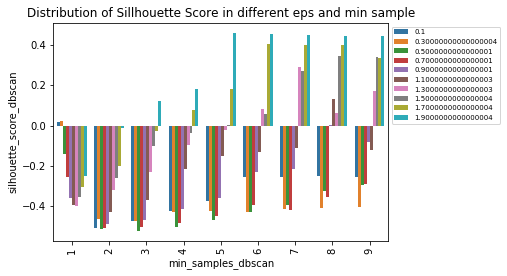

In [57]:
# PLot the above result:

sns.barplot(x=df_dbscan['min_samples_dbscan'], y=df_dbscan['silhouette_score_dbscan'], hue =df_dbscan['eps_dbscan'], data=df_dbscan)
plt.title('Distribution of Sillhouette Score in different eps and min sample')
plt.xticks(rotation=90)
plt.legend(loc="upper left", prop={'size': 7}, bbox_to_anchor=(1,1))

plt.show()

In [58]:
# Defining the DBSCAN clustering method:

dbscan_cluster = DBSCAN(eps=1.9, min_samples=5)

# Fit model
%timeit dbscan_cluster.fit(x1)

clusters = dbscan_cluster.fit_predict(x1)

print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(x1, clusters, metric='euclidean')))

5.02 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The silhouette score of the DBSCAN solution: 0.4610894553514605


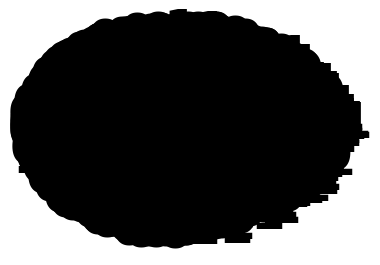

In [59]:
# visualize our dataset of DBSCAN Clustering Algorithm in two-dimensional space with PCA: 

plt.figure(figsize=(3,2))
cmap=plt.cm.get_cmap('nipy_spectral')
pca = PCA(n_components=2).fit_transform(x)

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=cmap(clusters[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

According to the DBSCAN result, density is very much in the first cluster and most of the customers clusterd in the one cluster and lower number of variables are as an outlier.
Also in the DBSCAN time elapsed is much higher than MiniBatchKMeans, Kmeans and Agglomerativetime. 

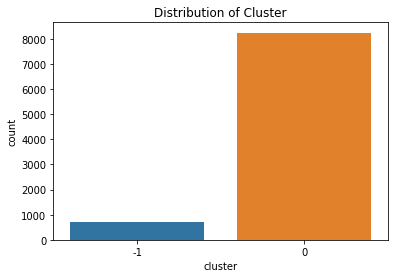

In [60]:
# Plot the result:
x_dbscan= pd.DataFrame(df1)
dbscan_cluster = DBSCAN(eps=1.9, min_samples=5)
y_pred = dbscan_cluster.fit_predict(x1)
x_dbscan["cluster"] = y_pred
cols = list(x_dbscan.columns)

sns.countplot(x='cluster', data=x_dbscan)
plt.title("Distribution of Cluster")
plt.show()



According to the plot, this method has clustered almost all of the customers in the one cluster and put few ones as an outlier. 

In [61]:
# Calculate the Average values of columns in each cluster:
x_dbscan.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
-1,"$4,194.71",$0.93,"$4,299.73","$2,792.01","$1,508.60","$3,401.00",$0.71,$0.45,$0.54,$0.30,$10.95,$49.39,"$9,334.96","$6,886.52","$3,061.70",$0.20,$11.21
0,"$1,337.84",$0.87,$719.16,$402.91,$316.50,$770.17,$0.47,$0.18,$0.35,$0.12,$2.58,$11.72,"$4,077.37","$1,289.10",$674.86,$0.15,$11.54


Evaluating model with the silhouette score metric to choose the best DBSCAN result does not seem a suitable method for our model even with a high silhouette score. This is because we have all number of customers in the one cluster and distribution of variables is not homogenous.

However, In order to see differences in clusters, I choose the one with 5 minimum sample and 2 clusters with eps:1.9 which gives higher DBSCAN silhouette_score of 0.46.

**4. Applying Gaussian Mixture Models (GMM) approach to clustering:**


- K-means does not account for variance and works fine for when your data is circular. In contrast, GMM can handle even very oblong clusters. So I decided to apply this method to see the results of an unsupervised machine learning method.

In [62]:
# Finding best params by calculating Silhouette score for different number of clusters and covariance type:

silhouette_list_GMM = []

for cluster in range(2,21,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 123).fit_predict(x)
        silhouette_score = metrics.silhouette_score(x, gmm, metric='euclidean')
        silhouette_list_GMM.append((silhouette_score, covariance_type, len(set(gmm)) ) )
        
df_gmm = pd.DataFrame(silhouette_list_GMM, columns=['silhouette_score_GMM','covariance_type_GMM', 'number_of_clusters_GMM'])
df_gmm.sort_values(by='silhouette_score_GMM', ascending=False).head(5)

,silhouette_score_GMM,covariance_type_GMM,number_of_clusters_GMM
3,$0.22,spherical,2
1,$0.21,tied,2
7,$0.20,spherical,4
2,$0.20,diag,2
19,$0.17,spherical,10


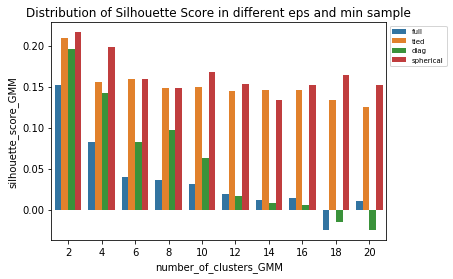

In [63]:
# PLot the above result:

sns.barplot(x=df_gmm['number_of_clusters_GMM'], y=df_gmm['silhouette_score_GMM'], hue =df_gmm['covariance_type_GMM'], data=df_gmm)
plt.title('Distribution of Silhouette Score in different eps and min sample')
plt.legend(loc="upper left", prop={'size': 7}, bbox_to_anchor=(1,1))
plt.show()

According to the result, the highest Silhouette Score is for number of 2 clusters and covariance_type of Tied.

In [64]:
# Defining the GMM clustering:

gmm_cluster = GaussianMixture(n_components=2, covariance_type= 'spherical', random_state=123)

# Fit model
%timeit gmm_cluster.fit(x)

clusters = gmm_cluster.fit_predict(x)

print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(x, clusters, metric='euclidean')))

30.5 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The silhoutte score of the GMM solution: 0.21627954252424883


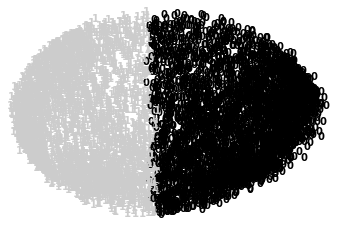

In [65]:
# visualize our dataset of GMM Clustering Algorithm in two-dimensional space with PCA: 

plt.figure(figsize=(3,2))
cmap=plt.cm.get_cmap('nipy_spectral', 2)
pca = PCA(n_components=2).fit_transform(x)

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=cmap(clusters[i]),
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

By applying GMM clustering on dataset, plotting with PCA and coloring, we can idenfity each cluster.

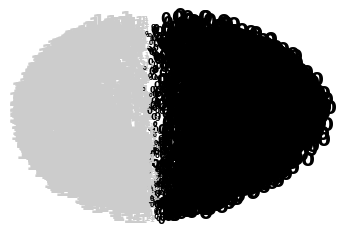

In [66]:
# we demonstrate the soft clustering aspect of the GMM by resizing the points according to the highest probability:

plt.figure(figsize=(3,2))
probs = gmm_cluster.predict_proba(x)

size = 20 * probs.max(1) ** 2 
cmap=plt.cm.get_cmap('nipy_spectral', 2)

pca = PCA(n_components=2).fit_transform(x)

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=cmap(clusters[i]),
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

By applying GMM clustering on dataset, plotting with PCA, coloring each cluster and giving size-based probability, we can idenfity each cluster.

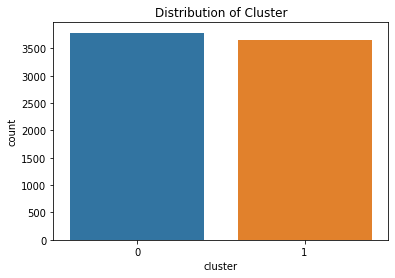

In [67]:
# Plot the result:

x_gmm= pd.DataFrame(df)
gmm_cluster = GaussianMixture(n_components=2, covariance_type= 'spherical', random_state=123)
y_pred = gmm_cluster.fit_predict(x)
x_gmm["cluster"] = y_pred
cols = list(x_gmm.columns)


sns.countplot(x='cluster', data=x_gmm)
plt.title("Distribution of Cluster")
plt.show()

According to the plot, the distribution of customers per cluster is almost the same. The number of customers in cluster 0 is a bit higher.

In [68]:
# Calculate the average value of each column in each cluster:
x_gmm.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,$999.61,$0.92,"$1,299.15",$703.44,$596.09,$283.36,$0.83,$0.31,$0.65,$0.05,$0.99,$21.53,"$4,381.54","$1,466.55",$536.37,$0.26,$11.79
1,"$1,550.58",$0.86,$185.83,$148.51,$37.46,"$1,075.69",$0.13,$0.07,$0.06,$0.17,$3.69,$2.22,"$3,602.78","$1,122.00",$641.82,$0.05,$11.71


According to the results:

- Cluster 0: These customers of the cluster indicates a group of customers who have a low BALANCE and CASH_ADVANCE with high PURCHASES and PURCHASES_FREQUENCY. We can assume that these customers with high usage of credit card. The number of customers in this cluster is higher.

- Cluster 1: These customers of the cluster indicates a group of customers who have a high BALANCE  and CASH_ADVANCE with low PURCHASES and PURCHASES_FREQUENCY with the low PURCHASES_INSTALLMENTS_FREQUENCY. We can assume that these customers with least usage of credit card. The number of customers in this cluster is lower.

 **Compering Results of Methods to Find the Optimal Number of Cluster Model**

In [69]:
# Applying different methods:

kmeans = KMeans(n_clusters=2, random_state=123).fit_predict(x)
hierarchical = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2).fit_predict(x)
dbscan = DBSCAN(eps=1.9, min_samples=5).fit_predict(x1)
gmm = GaussianMixture(n_components=2, covariance_type='spherical', random_state=123).fit_predict(x)

In [70]:
# Evaluate different method by using Silhouette score:

kmeansSilhouette_Score = metrics.silhouette_score(x, kmeans, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(x, hierarchical, metric='euclidean')
DBSCAN_Silhouette_Score = metrics.silhouette_score(x1, dbscan, metric='euclidean')
GMM_Silhouette_Score = metrics.silhouette_score(x, gmm, metric='euclidean')

In [71]:
KMeans_model = KMeans(n_clusters=2, random_state=123)
kmeans_time = %timeit -o KMeans_model.fit(x)

hierarchical_model = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
hierarchical_time = %timeit -o hierarchical_model.fit(x)

dbscan_model = DBSCAN(eps=1.9, min_samples=5)
dbscan_time = %timeit -o dbscan_model.fit(x)

gmm_model = GaussianMixture(n_components=2, covariance_type='spherical', random_state=123)
gmm_time = %timeit -o gmm_model.fit(x)###???????

141 ms ± 5.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.35 s ± 348 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.46 s ± 1.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
26.6 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [72]:
silhouette_scores_methods = [ ['KMeans', kmeansSilhouette_Score, kmeans_time],
                                ['Hierarchical',Hierarchical_Silhouette_Score, hierarchical_time],
                                ['DBSCAN', DBSCAN_Silhouette_Score, dbscan_time], ['GMM', GMM_Silhouette_Score, gmm_time]]

silhouette_scores_methods  = pd.DataFrame(silhouette_scores_methods, columns=['Clustering Method', 'Silhouette Score', 'Time Elapsed']) 
silhouette_scores_methods.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score,Time Elapsed
2,DBSCAN,$0.46,5.46 s ± 1.2 s per loop (mean ± std. dev. of 7...
0,KMeans,$0.22,141 ms ± 5.73 ms per loop (mean ± std. dev. of...
3,GMM,$0.22,26.6 ms ± 1.76 ms per loop (mean ± std. dev. o...
1,Hierarchical,$0.16,3.35 s ± 348 ms per loop (mean ± std. dev. of ...


According to the result, DBSCAN with highest Silhouette Score is the the best clustering method, but based on DBSCAN result, most of the customers clusterd in the one cluster and the lower number of variables are as an outlier, so density is very much in the first cluster. Hence, evaluating model with the silhouette score metric to choose the best method does not seem a suitable one for DBSCAN model even with a high silhouette score.

The Second Highest Silhouette Score is for Kmeans and GMM. So, compare distribution of variables and time elapsed in both clustering method to find best one.

According to the result, Time Elapsed in GMM method is much less then kmeans method. So, compare distribution of variables in both clustering method to find best one.

- Comparing Kmeans and GMM Clustering method in terms of Customer Distribution per Cluster: 

In [73]:
# Look at the distribution of kmeans method:
kmeans_cluster = KMeans(n_clusters=2, random_state=123)
y_pred = kmeans_cluster.fit_predict(x)
x_kmeans["cluster"] = y_pred
cols = list(x_kmeans.columns)

x_kmeans["cluster"].value_counts()

0    3851
1    3583
Name: cluster, dtype: int64

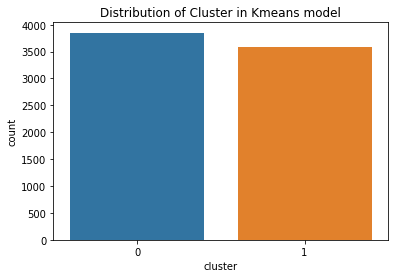

In [74]:
# Plot the result:
sns.countplot(x='cluster', data=x_kmeans)
plt.title("Distribution of Cluster in Kmeans model")
plt.show()

According to the plot, the number of customers per cluster distributes almost the same without any density in any cluster. 

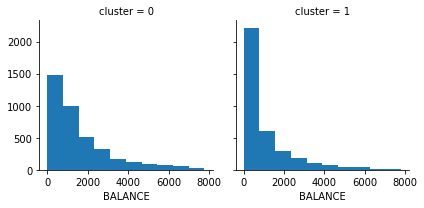

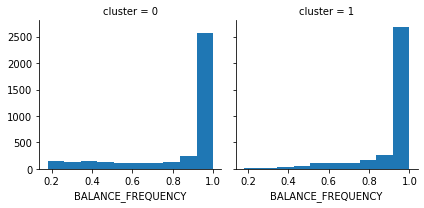

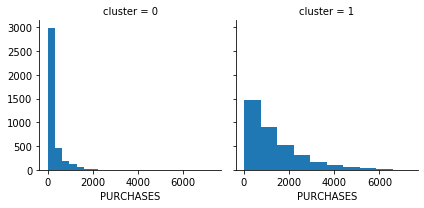

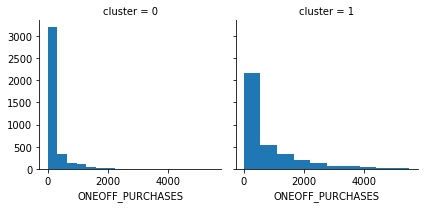

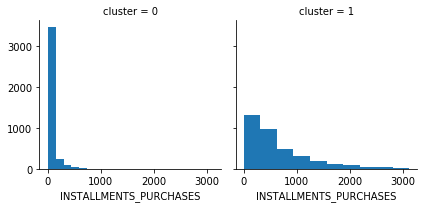

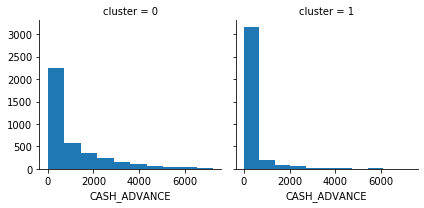

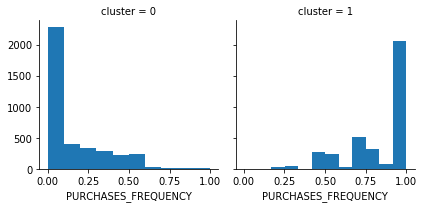

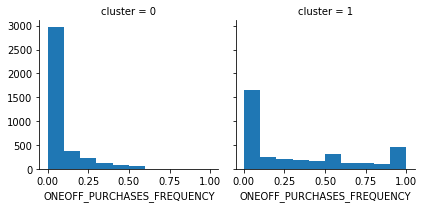

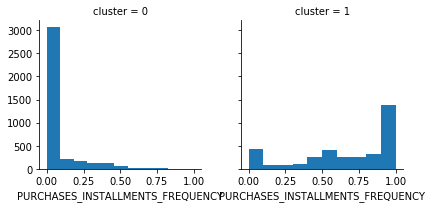

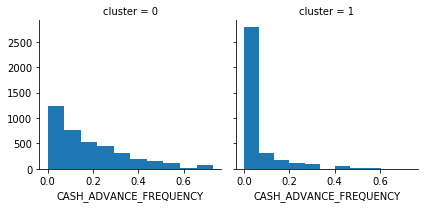

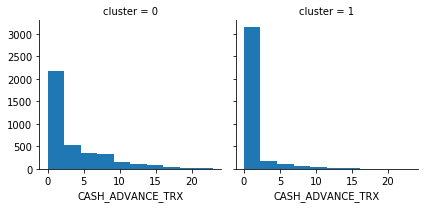

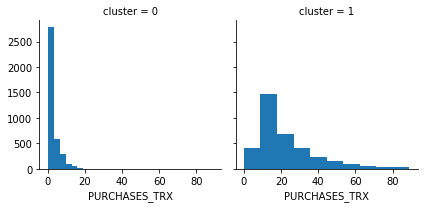

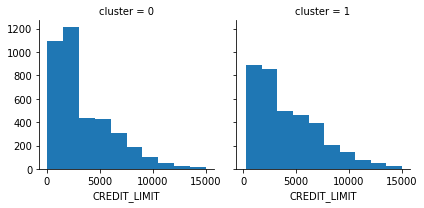

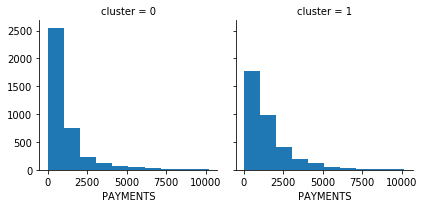

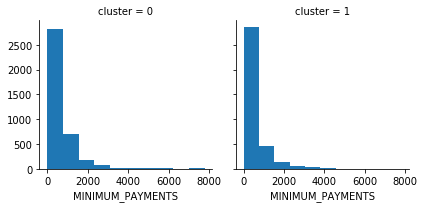

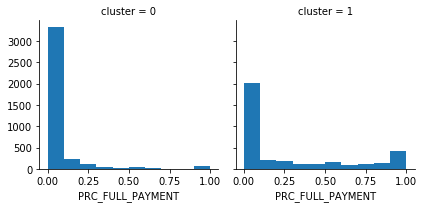

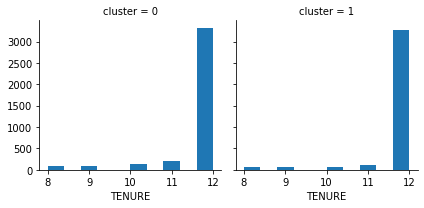

In [75]:
# Clusters Interpretation by using FacetGrid plot:
for cols in x_kmeans.drop('cluster',axis=1):
    g = sns.FacetGrid(x_kmeans, col = 'cluster')
    g.map(plt.hist, cols)

In [76]:
# Calculate the average value of each column in each cluster:
x_kmeans.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,"$1,542.42",$0.86,$210.53,$164.83,$45.91,"$1,052.13",$0.15,$0.08,$0.07,$0.17,$3.60,$2.54,"$3,662.41","$1,125.75",$646.84,$0.05,$11.71
1,$976.85,$0.93,"$1,336.30",$717.65,$618.97,$263.35,$0.85,$0.32,$0.67,$0.05,$0.93,$22.29,"$4,362.01","$1,482.23",$524.95,$0.26,$11.80


According to the results:

- Cluster 0: These customers of the cluster indicates a group of customers who have a higher BALANCE and CASH_ADVANCE	with low PURCHASES and PURCHASES_FREQUENCY. We can assume that these customers with least usage of credit card. The number of customers in this cluster is a bit higher.

- Cluster 1: These customers of the cluster indicates a group of customers who have high PURCHASES and PURCHASES_FREQUENCY with the high PURCHASES_INSTALLMENTS_FREQUENCY. We can assume that these customers with more usage of credit card and makes more frequent purchases of product.

In [77]:
# Look at the distribution of GMM method:
gmm_cluster = GaussianMixture(n_components=2, covariance_type= 'spherical', random_state=123)
y_pred = gmm_cluster.fit_predict(x)
x_gmm["cluster"] = y_pred
cols = list(x_gmm.columns)
x_gmm["cluster"].value_counts()

0    3788
1    3646
Name: cluster, dtype: int64

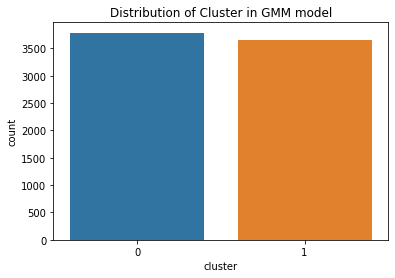

In [78]:
# Plot the result:
sns.countplot(x='cluster', data=x_gmm)
plt.title("Distribution of Cluster in GMM model")
plt.show()

According to the plot, the number of customers per cluster distribured almost the same without any density in any cluster.
I think the GMM method in compare with kmeans seems suitable in terms of variable distribution.

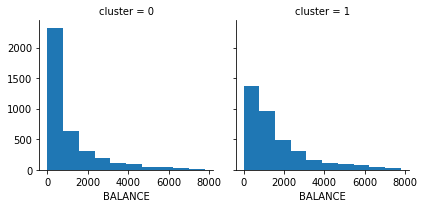

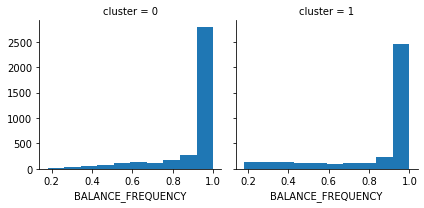

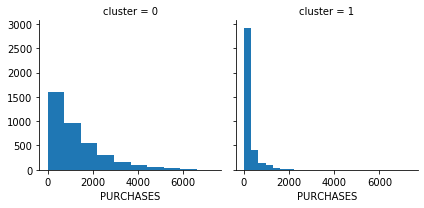

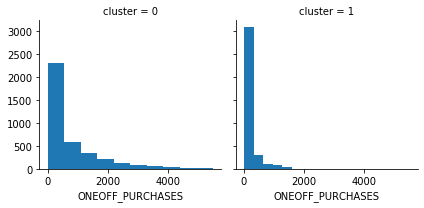

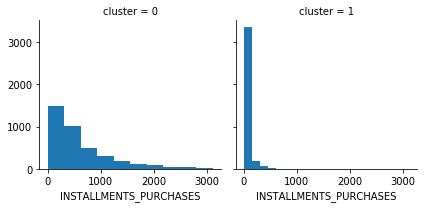

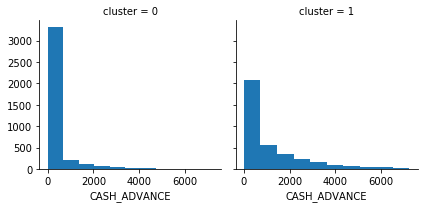

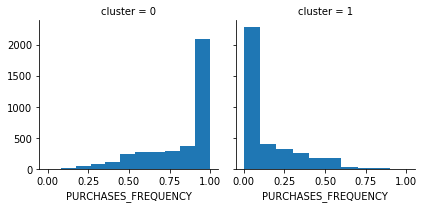

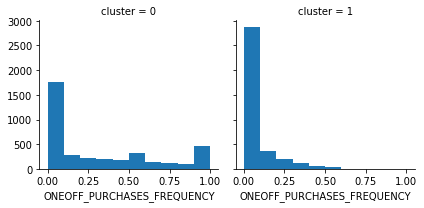

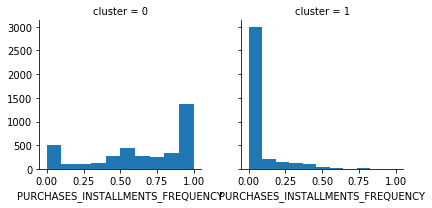

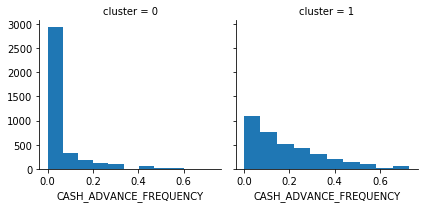

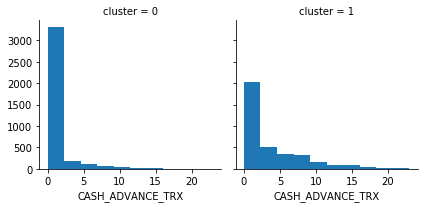

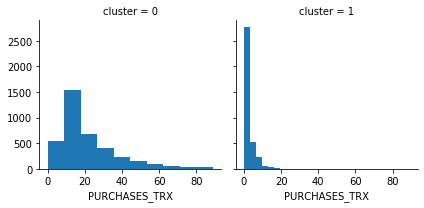

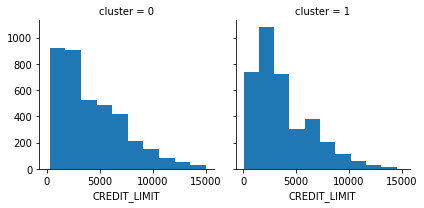

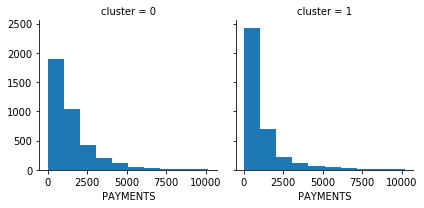

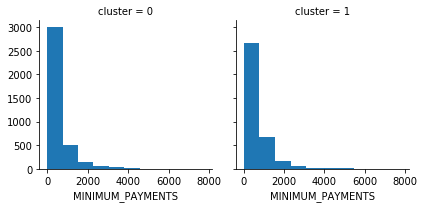

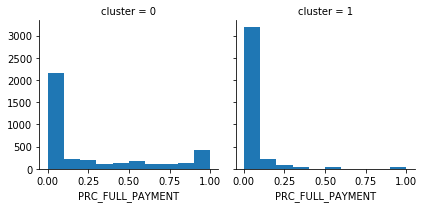

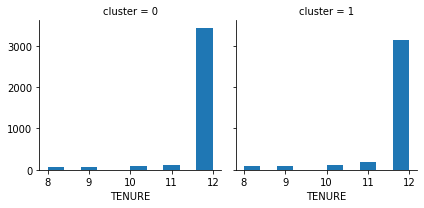

In [79]:
# Clusters Interpretation by using FacetGrid plot:
for cols in x_gmm.drop('cluster',axis=1):
    g = sns.FacetGrid(x_gmm, col = 'cluster')
    g.map(plt.hist, cols)

In [80]:
# Calculate the average value of each column in each cluster:
x_gmm.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,$999.61,$0.92,"$1,299.15",$703.44,$596.09,$283.36,$0.83,$0.31,$0.65,$0.05,$0.99,$21.53,"$4,381.54","$1,466.55",$536.37,$0.26,$11.79
1,"$1,550.58",$0.86,$185.83,$148.51,$37.46,"$1,075.69",$0.13,$0.07,$0.06,$0.17,$3.69,$2.22,"$3,602.78","$1,122.00",$641.82,$0.05,$11.71


According to the results:

- Cluster 0: These customers of the cluster indicates a group of customers who have a low BALANCE and CASH_ADVANCE with high CREDIT_LIMIT, PURCHASES, PURCHASES_FREQUENCY and INSTALLMENTS_PURCHASES. We can assume that these customers with high usage of credit card. The number of customers in this cluster is a bit higher which is good

- Cluster 1: These customers of the cluster indicates a group of customers who have a high BALANCE  and CASH_ADVANCE with low PURCHASES and PURCHASES_FREQUENCY with the low PURCHASES_INSTALLMENTS_FREQUENCY. We can assume that these customers with least usage of credit card. The number of customers in this cluster is a lower.

**Conclusion:**

By applying different methods:

- I chose the GMM model so that the variable distribution is the same per cluster without density. 
- GMM Time Elapsed is much less than others.


The goal of this study is customer segmentation by using customer behaviors in order to define a proper marketing strategy. So, according to the GMM models result, we have a better understanding of customer segmentation by using the 2 clusters model:


- Cluster 0: These customers of the cluster indicates a group of customers who have a low BALANCE and CASH_ADVANCE with high PURCHASES and PURCHASES_FREQUENCY. We can assume that these customers with high usage of credit card. The number of customers in this cluster is a bit higher.This group can be the target for market research. 

- Cluster 1: These customers of the cluster indicates a group of customers who have a high BALANCE and CASH_ADVANCE with low PURCHASES and PURCHASES_FREQUENCY with the low PURCHASES_INSTALLMENTS_FREQUENCY. We can assume that these customers with the least usage of credit card. The number of customers in this cluster is a bit lower. So, this group can be assumed for marketing strategies target, so we can use the behavior of clustering segmentation of above from marketing research to encourage these customers for higher usage of credit card. 

**Future Works:**

For Customers Segmentation based on their Credit Card usage behavior:

- Applying these models without removing outlier and comparing the result with this.
- Quality of the dataset could have been improved as well, for example dataset including Age, Income, Sex, etc.
- Analysis of the  Credit Card usage behavior can be enriched to find the reason of Customers Segmentation.
- More data can be added to the analysis to broaden conclusions.
- Newer data can be helpful in drawing better conclusions.